# ---------------------------CUSTOMER TRANSACTION PREDICTION---------------------

## 1.BUSINESS CASE

### To develop a predictive model to forecast customer transactions,where:

### - 1 indicates a customer will transact in the future

### - 0 indicates a customer will not transact in the future

#### Using a dataset with 202 columns(including traget,ID_code and var_0-var_199) and 2 lakh rows,our goal is to identify patterns and relationships that predict future customer transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train(1).csv')
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


## DOMAIN ANALYSIS

<!-- 1. ID_code : unique identifir for each customer -->
<!-- 2. target : indicates whether the customer made a transaction or not -->
<!-- 3. var_0 to var_199 : features related to each customer -->

### 1.ID_code : unique identifier for each customer

### 2.target : indicates whether the customer made a transaction(1) or not(0)

### 3.var_0 to var_199 : features related to each customer

# 2.BASIC CHECKS

In [3]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [5]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
df.describe(include = 'O')

,ID_code
count,200000
unique,200000
top,train_0
freq,1


In [7]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [8]:
df.shape

(200000, 202)

In [9]:
df.target.unique()

array([0, 1], dtype=int64)

In [10]:
df.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

# EDA

<Axes: xlabel='target', ylabel='count'>

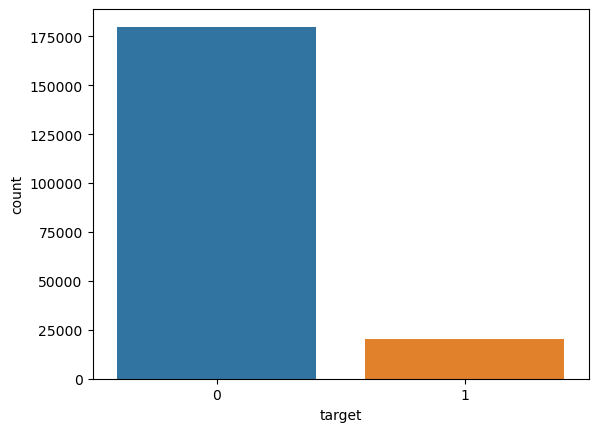

In [11]:
sns.countplot(x = df.target)

### insights : only 10% customers belongs to class 1

# 3. DATA PREPROCESSING

### 3.1 Handling with null values

In [12]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

### there are no null values

### 3.2 Handling with Outliers

In [13]:
df1 = df.drop(['target','ID_code'], axis = 1)

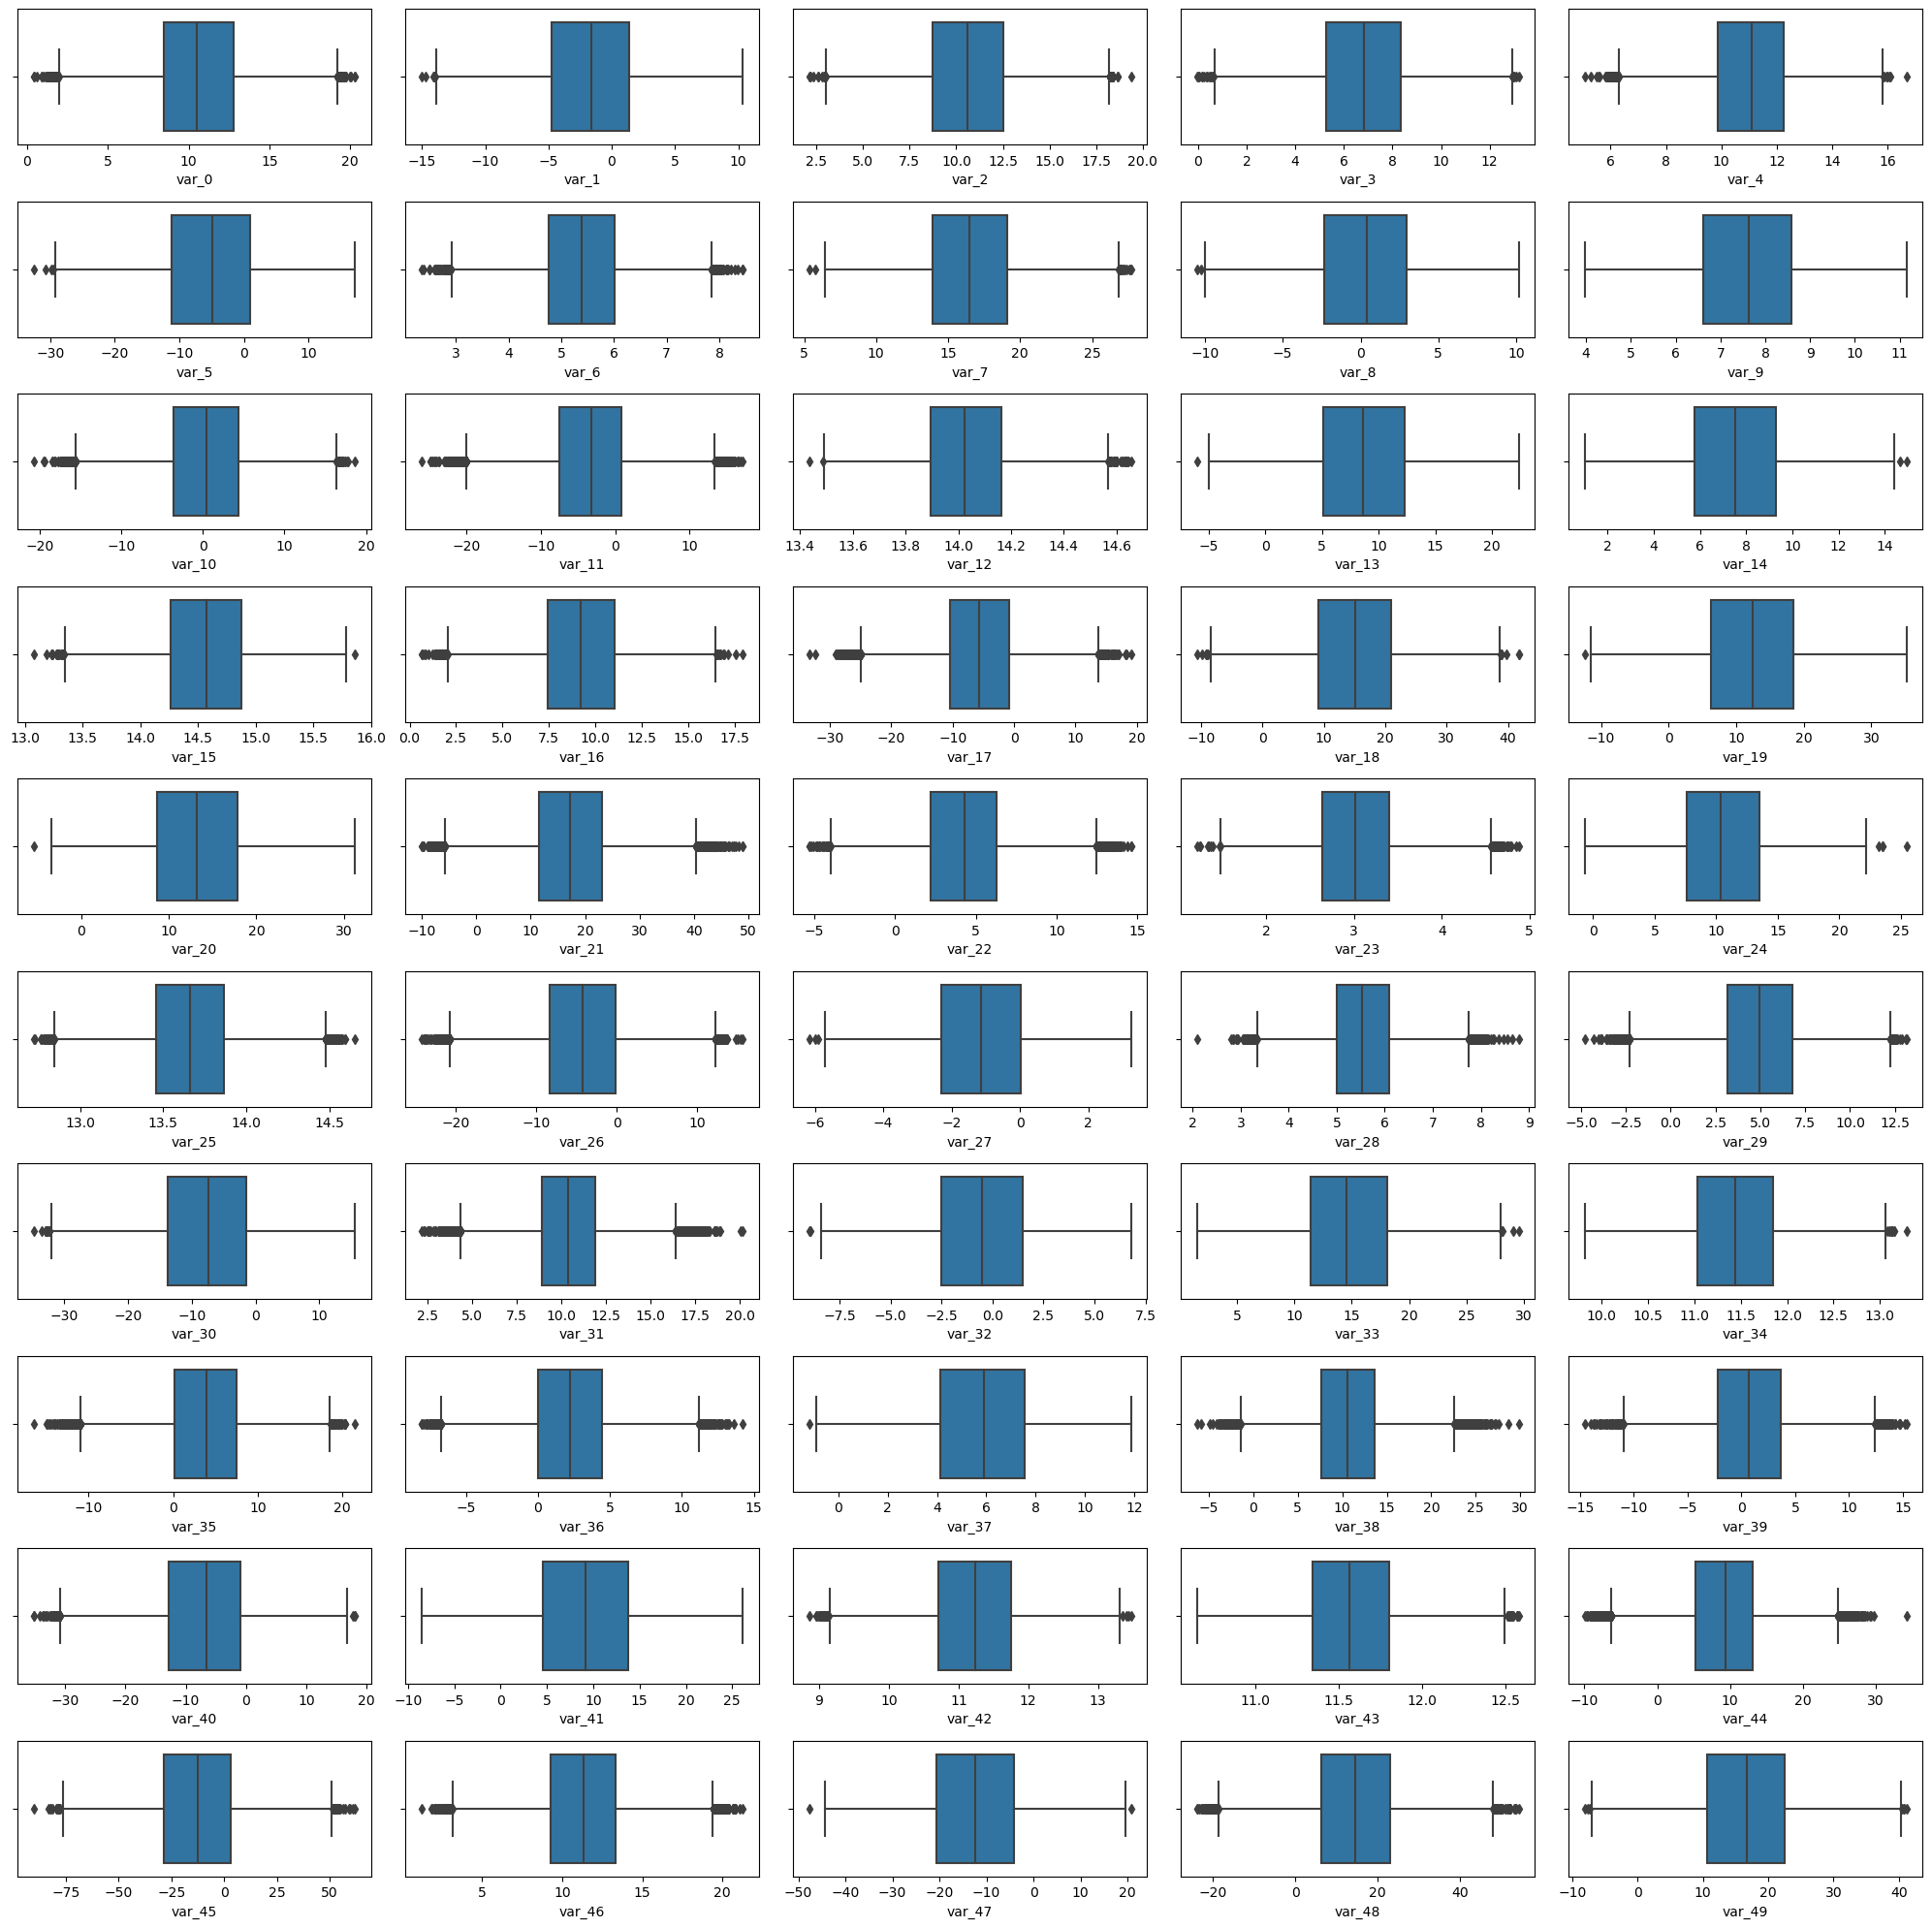

In [14]:
plt.figure(figsize=(20,20))
index = 1
for i in range(0,50):
    plt.subplot(10,5,index)                             #0 to 49 columns
    sns.boxplot(x = df1.iloc[:,i])
    index += 1
plt.tight_layout()
plt.show()

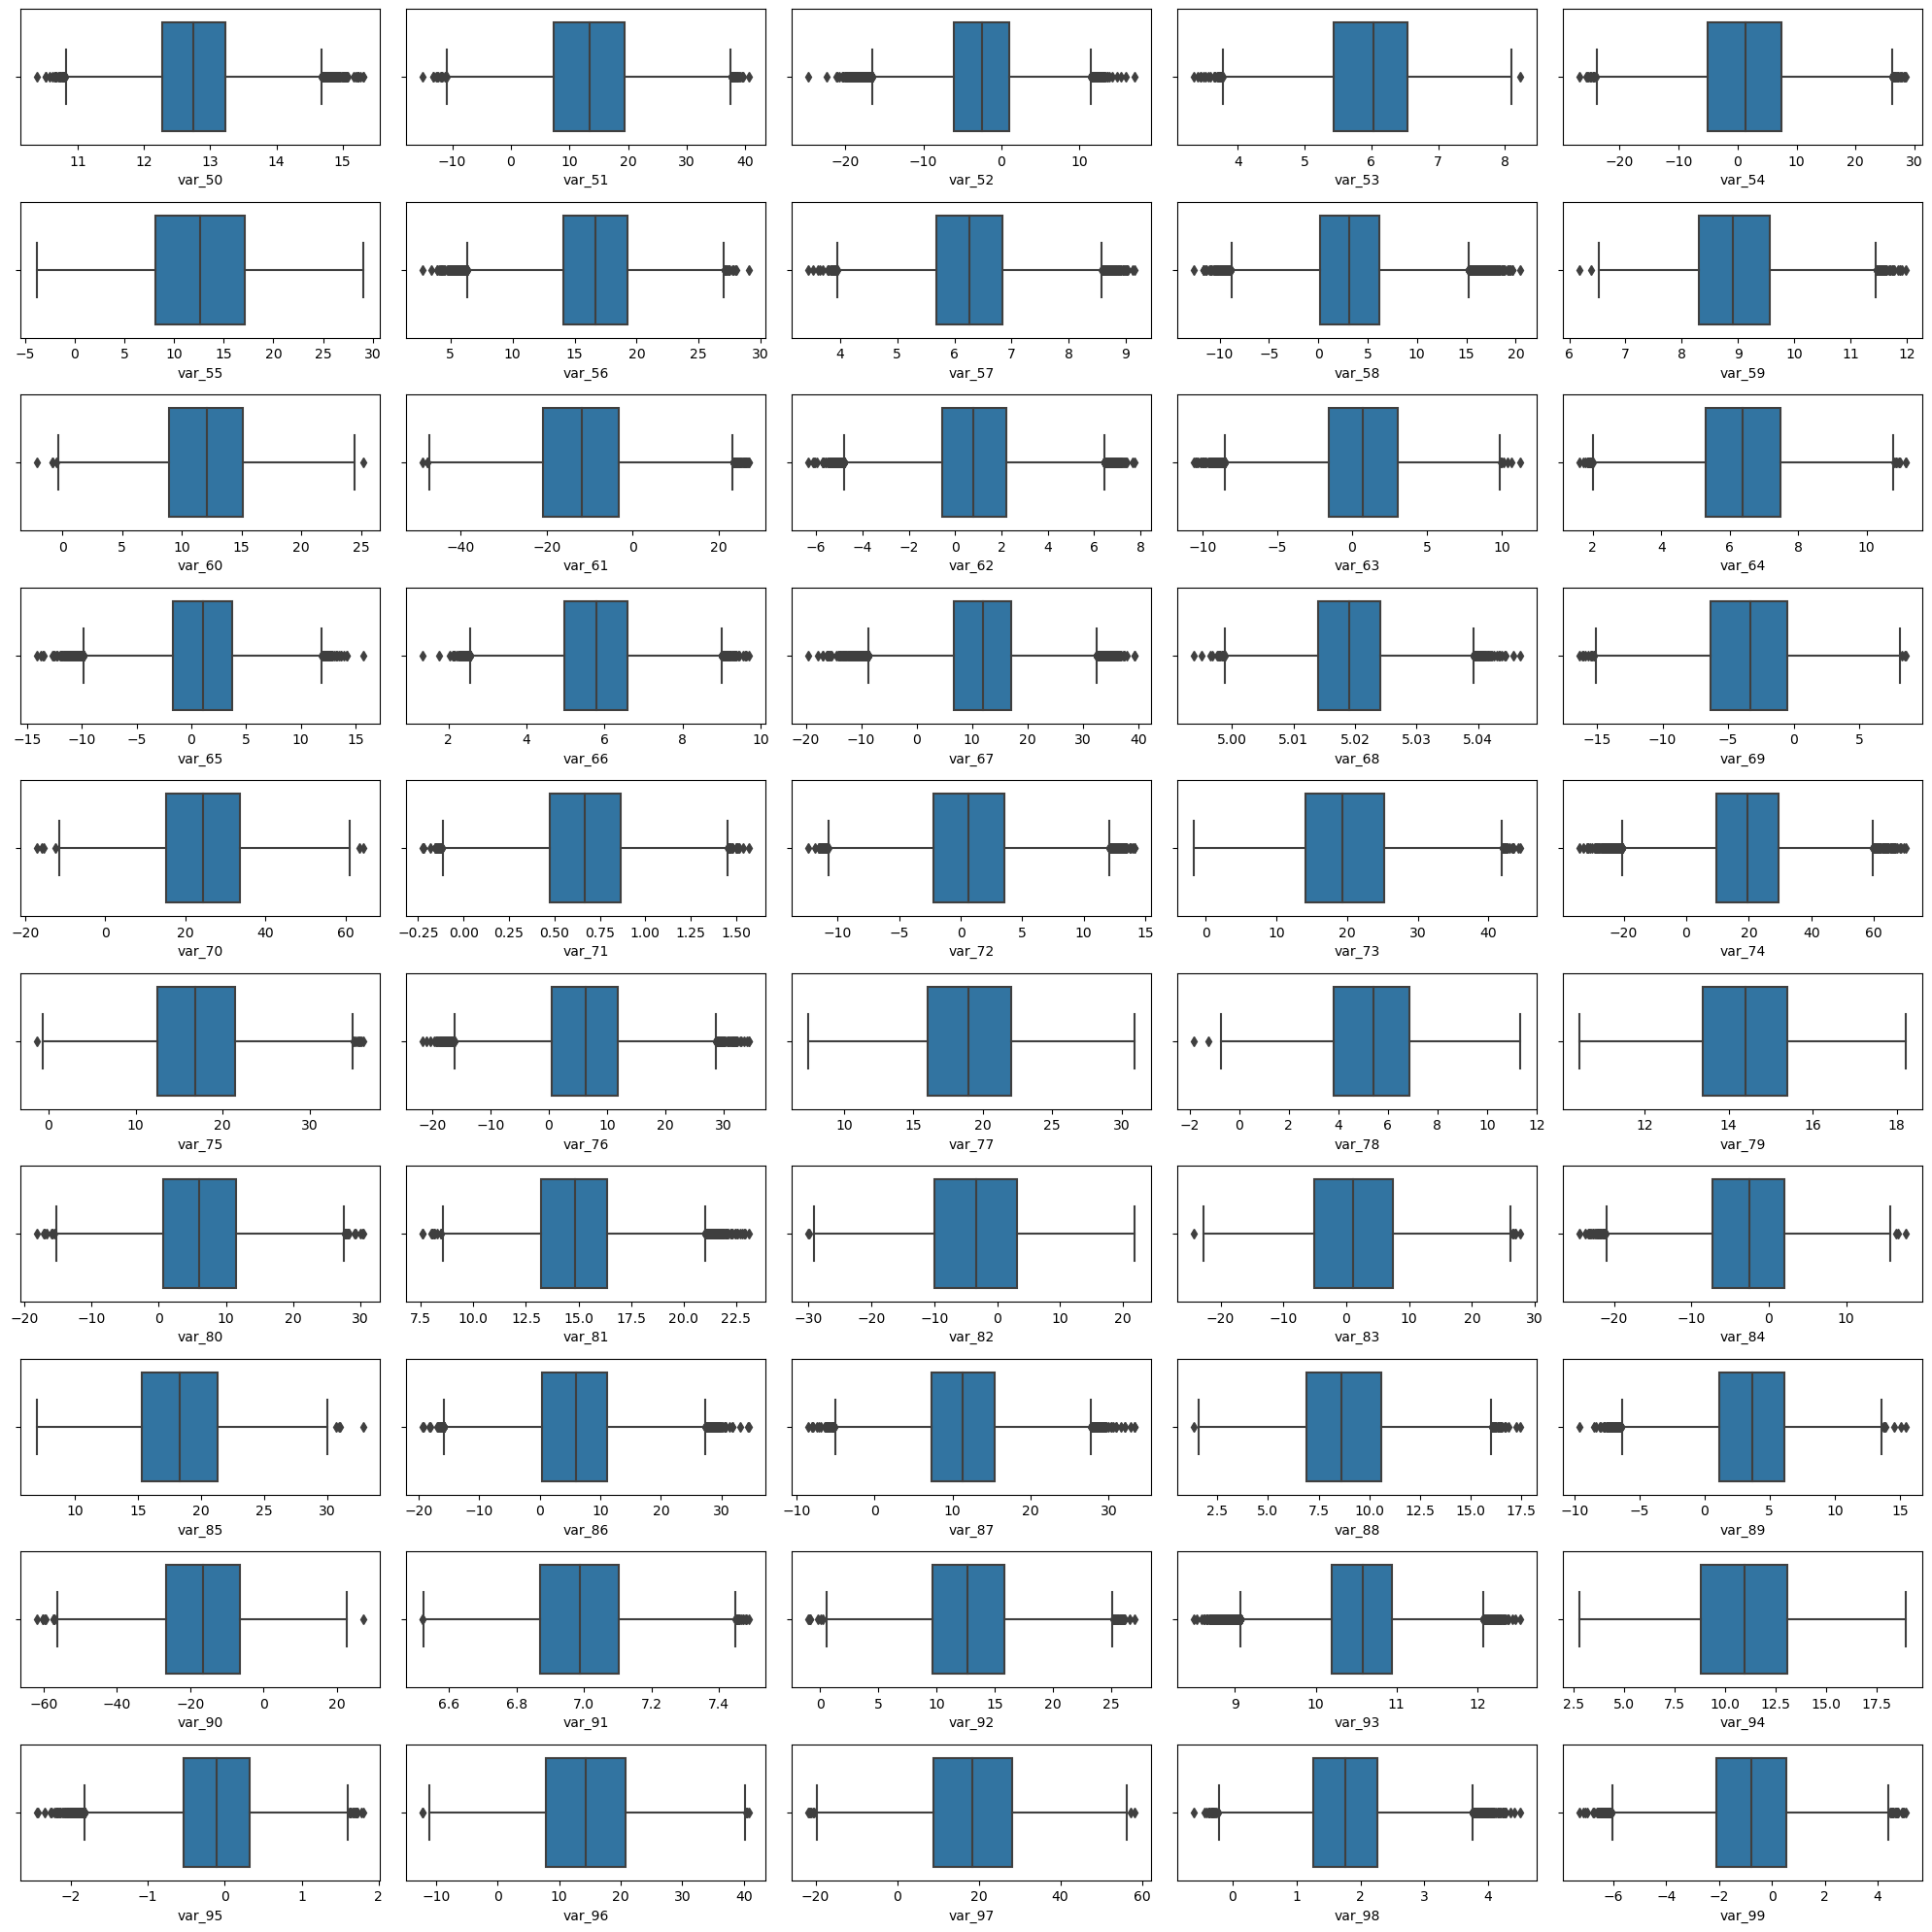

In [15]:
plt.figure(figsize=(20,20))
index = 1
for i in range(50,100):
    plt.subplot(10,5,index)                         # 50 to 99 columns
    sns.boxplot(x = df1.iloc[:,i])
    index += 1
plt.tight_layout()
plt.show()

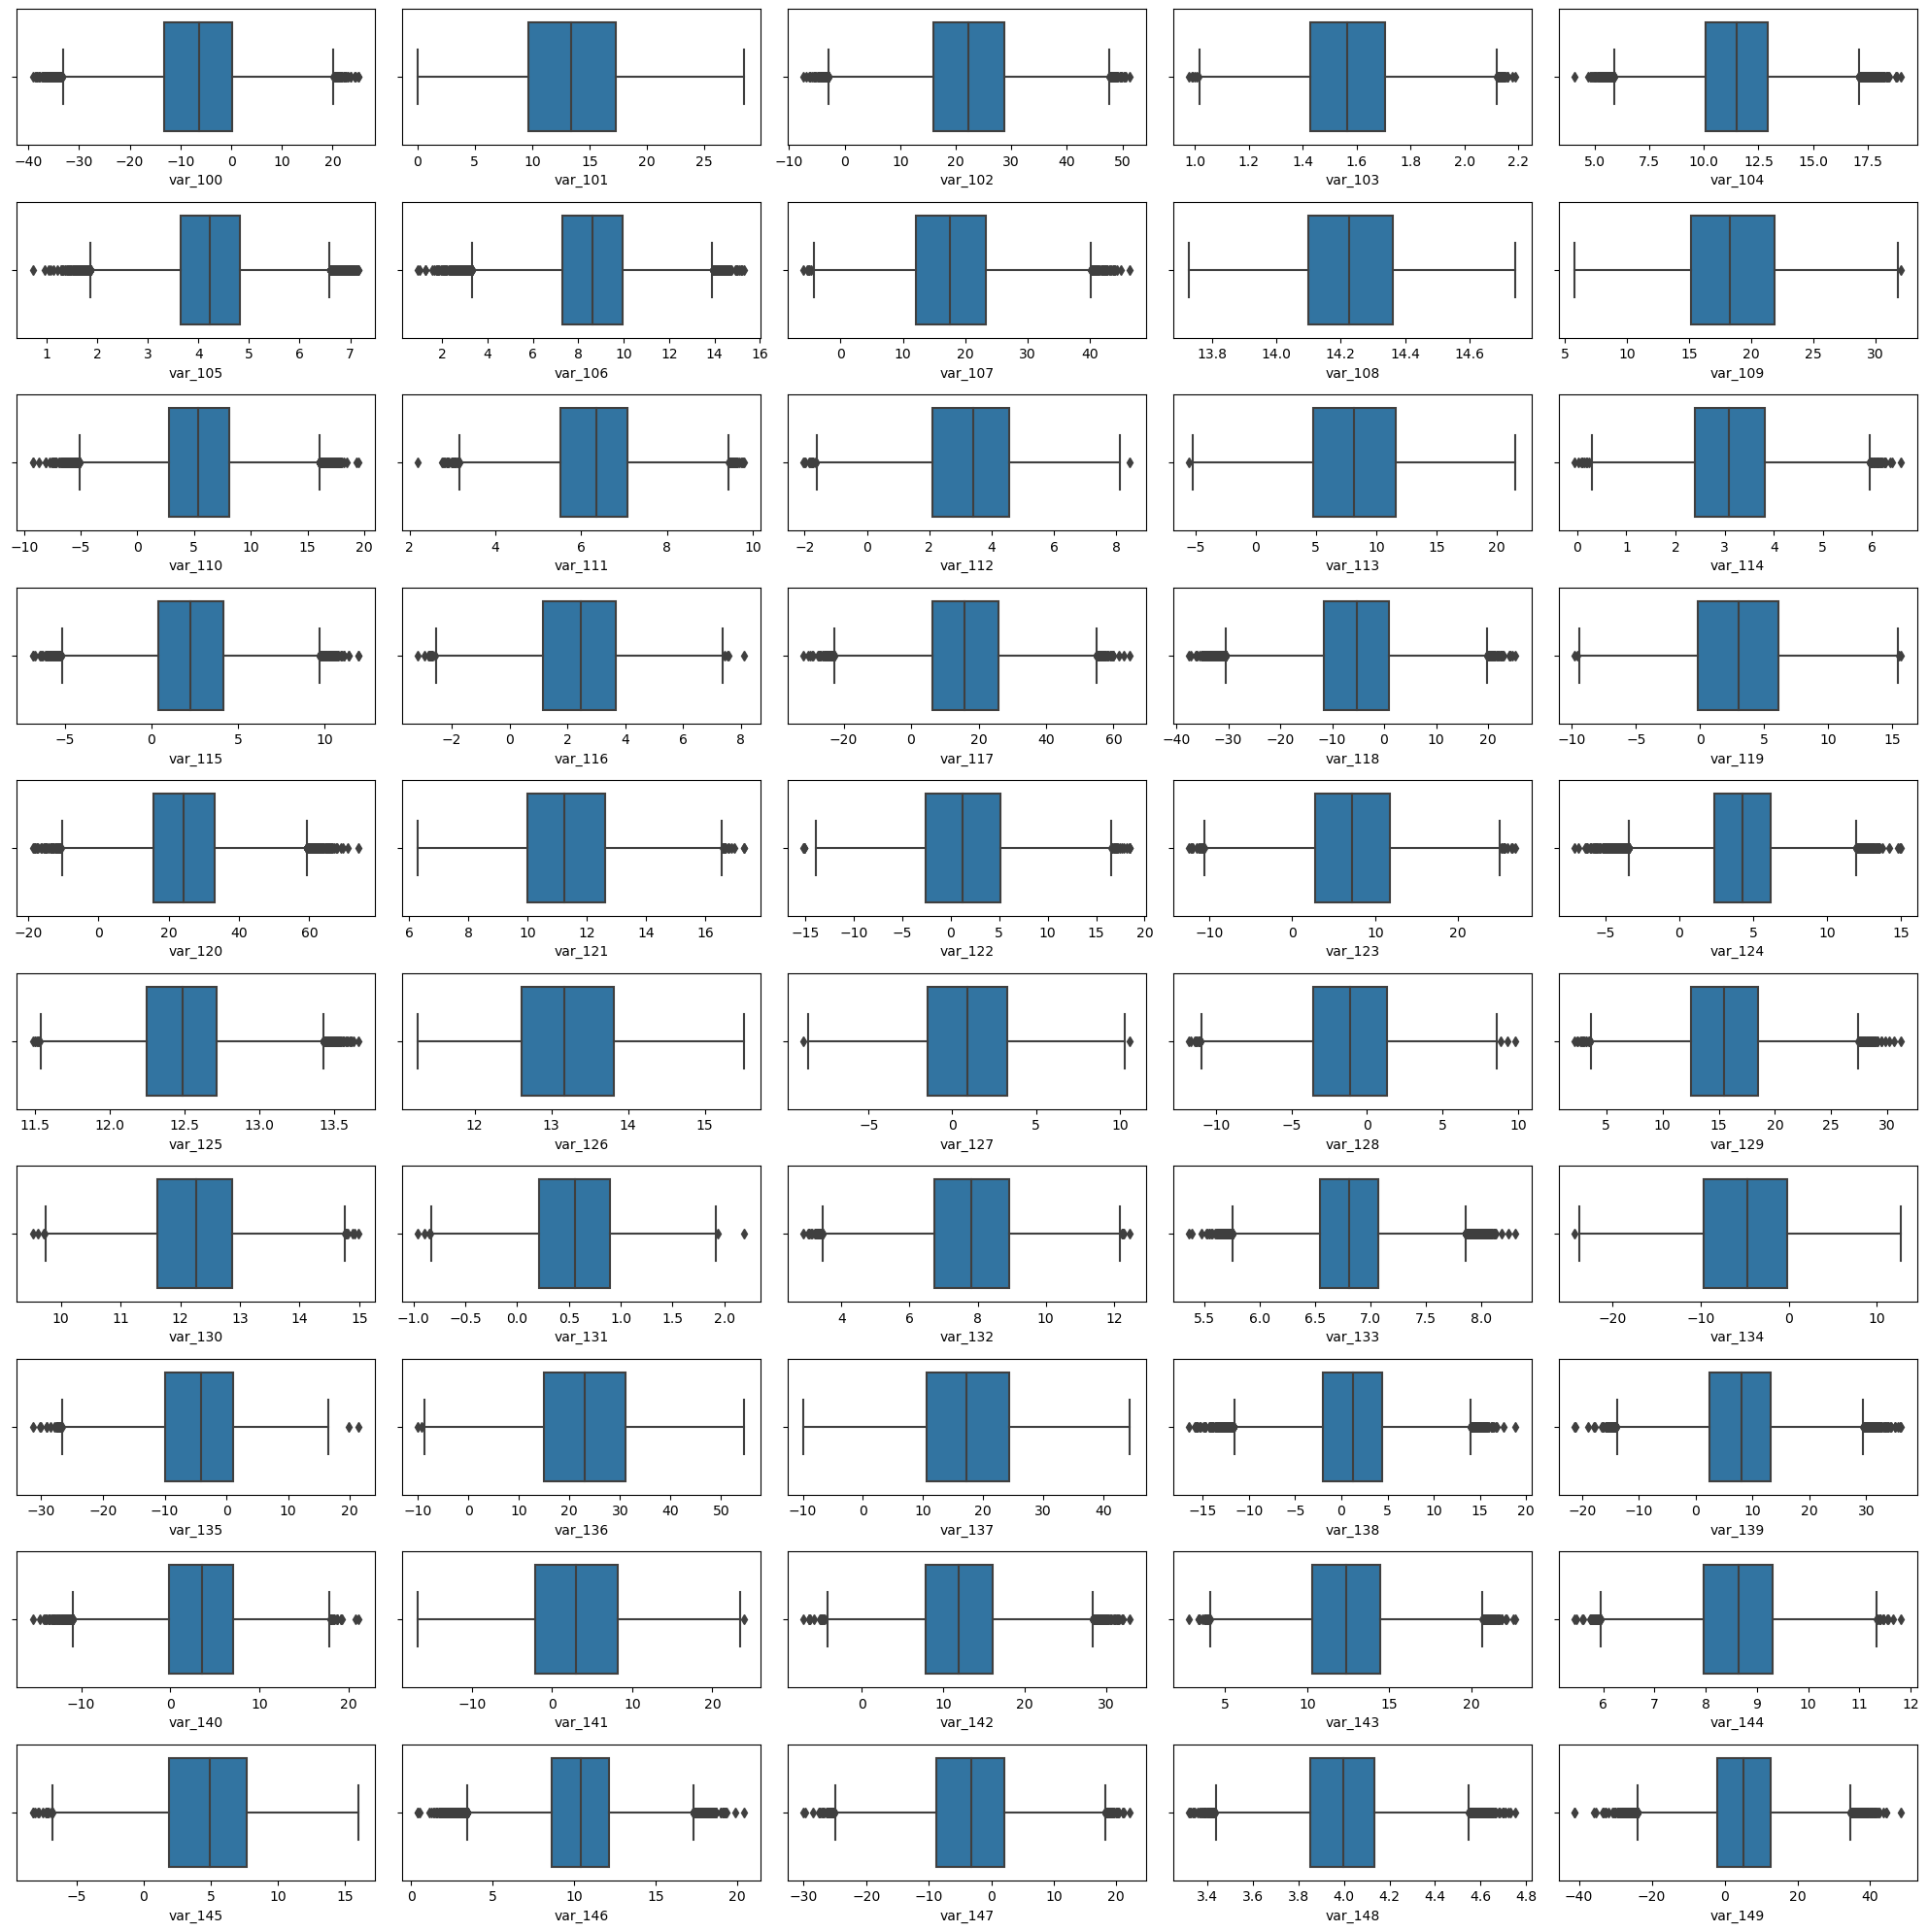

In [16]:
plt.figure(figsize=(20,20))
index = 1
for i in range(100,150):
    plt.subplot(10,5,index)                  #100 to 149 columns
    sns.boxplot(x = df1.iloc[:,i])
    index += 1
plt.tight_layout()
plt.show()

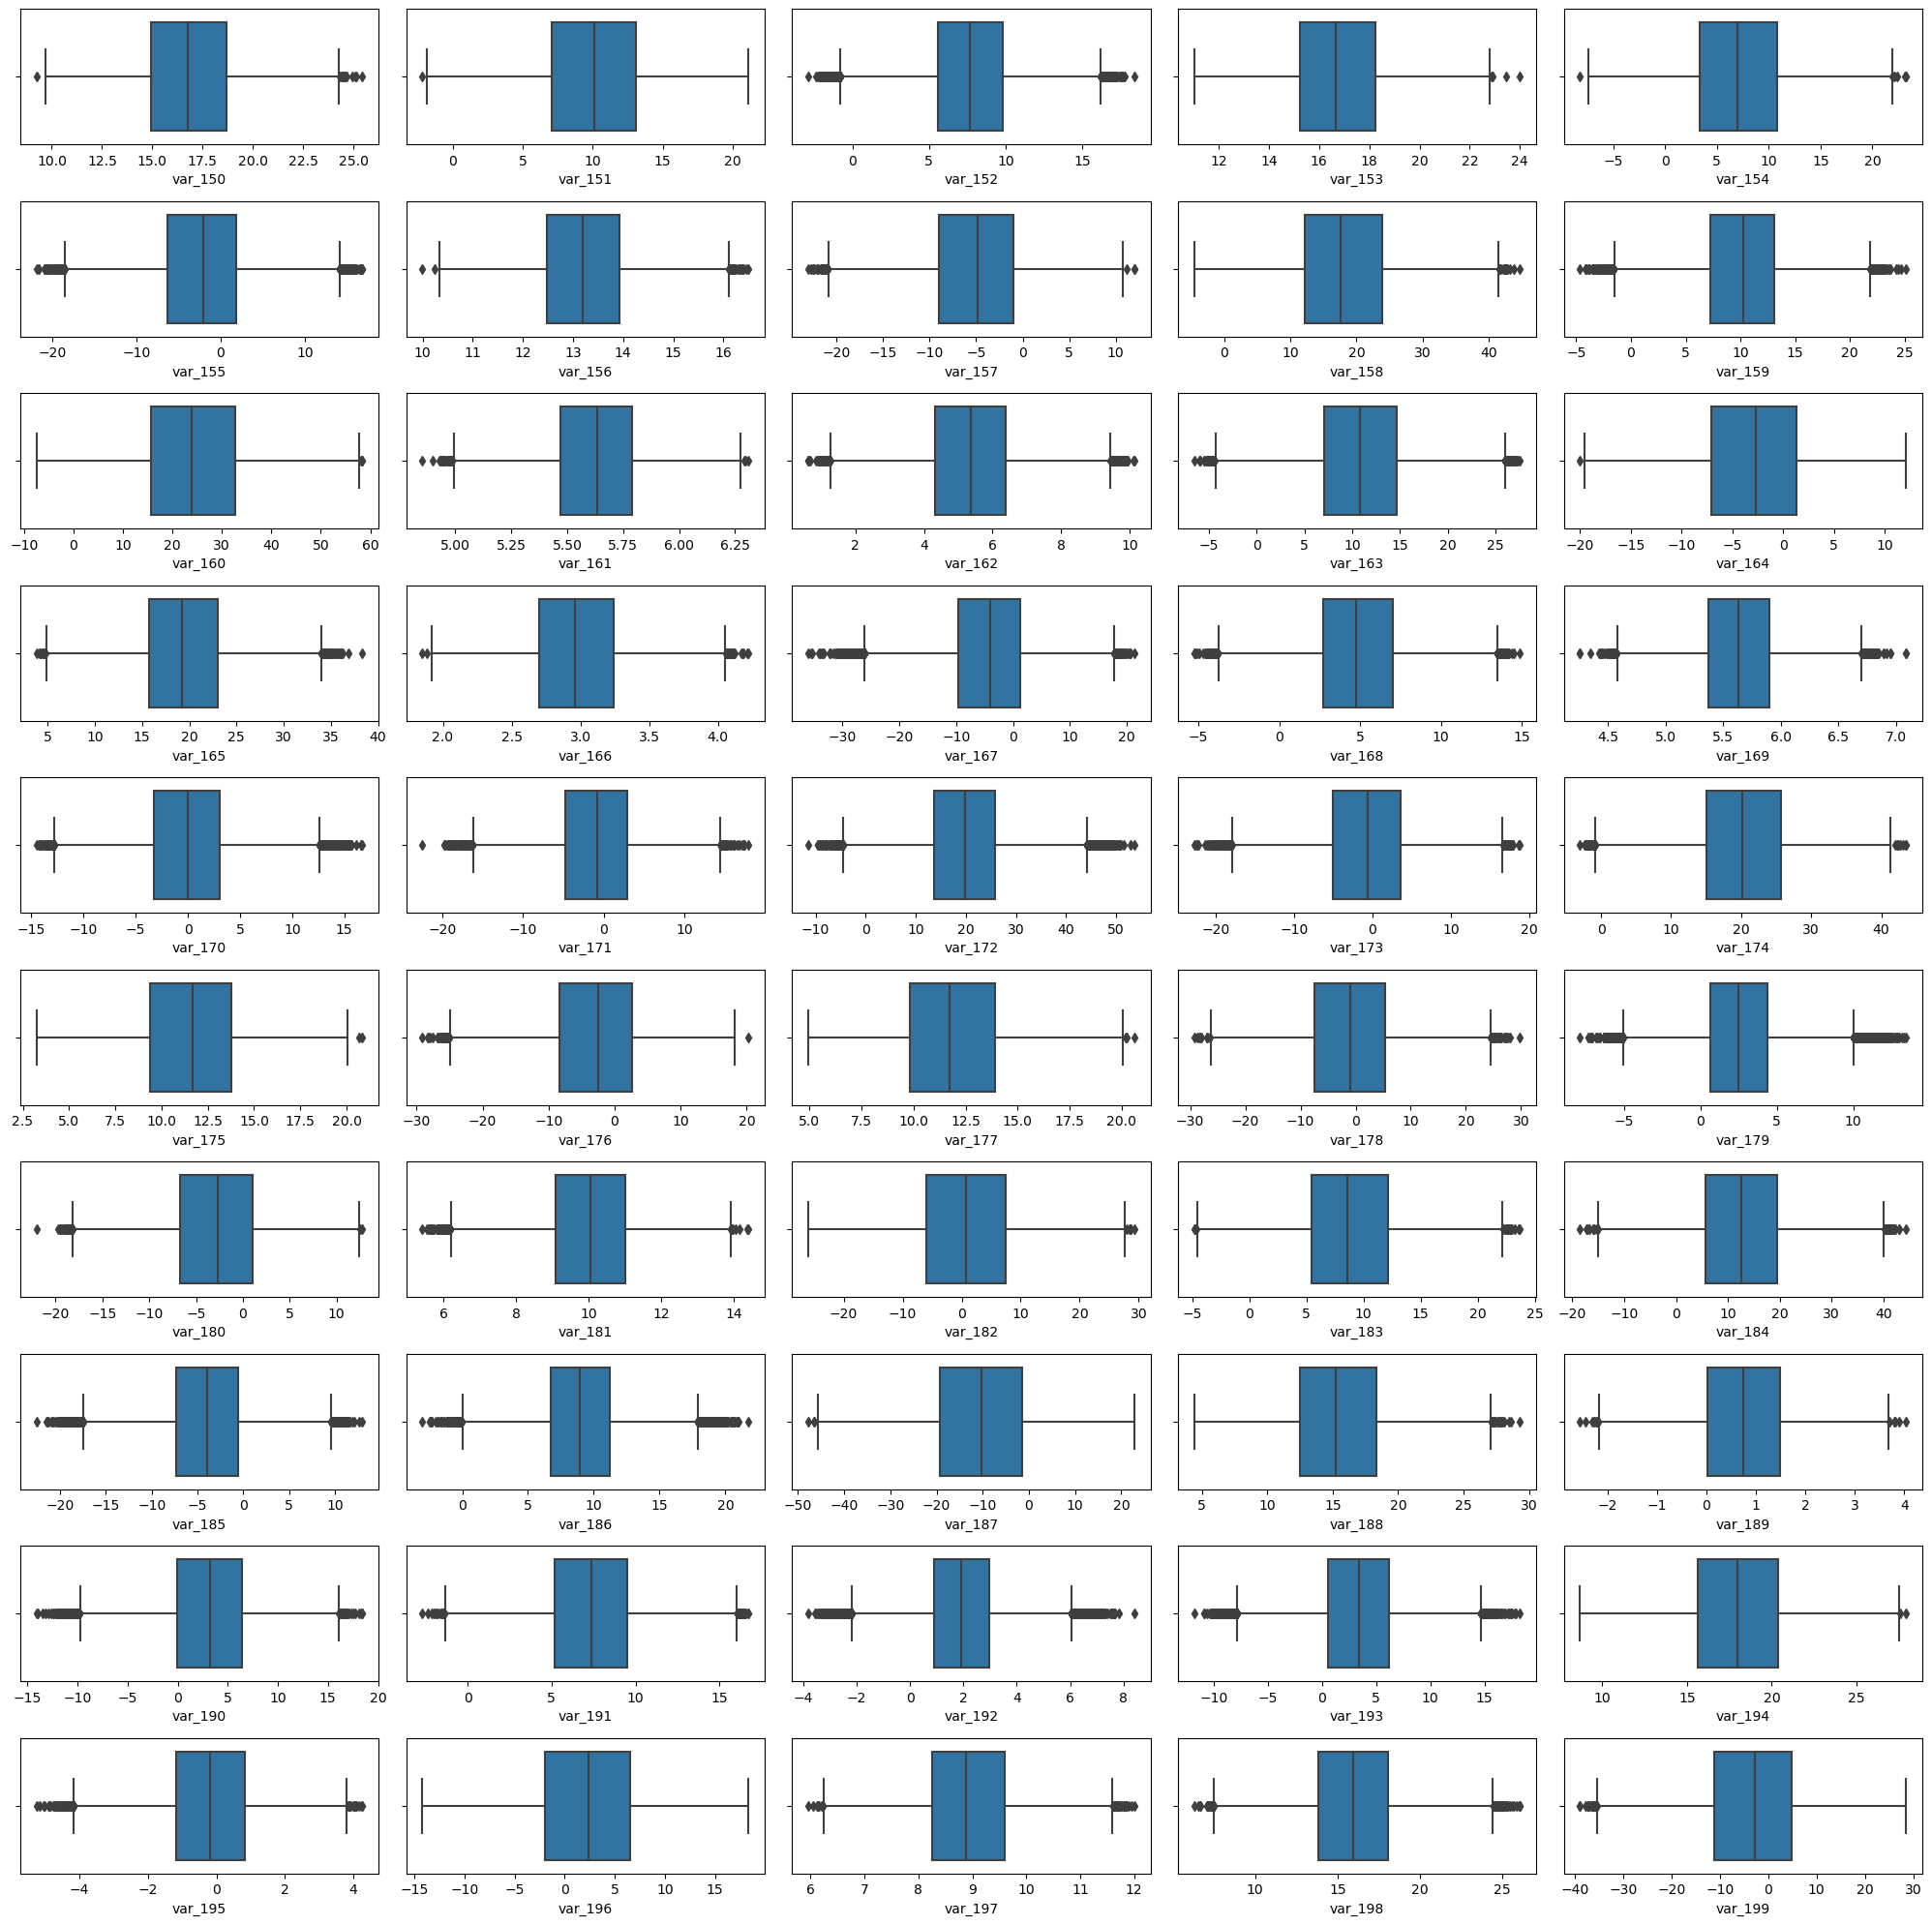

In [17]:
plt.figure(figsize=(20,20))
index = 1
for i in range(150,200):
    plt.subplot(10,5,index)                #150 to 199 columns
    sns.boxplot(x = df1.iloc[:,i])
    index += 1
plt.tight_layout()
plt.show()

##### No data is behaving like outlier.

### 3.3 Coversion of categorical data to numerical data

####      - There's no categorical data

### 3.4 Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

In [19]:
df2 = pd.DataFrame(data = scaled_data, columns = df1.columns)
df2

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


# 4. FEATURE SELECTION

### 4.1 Checking Correlation

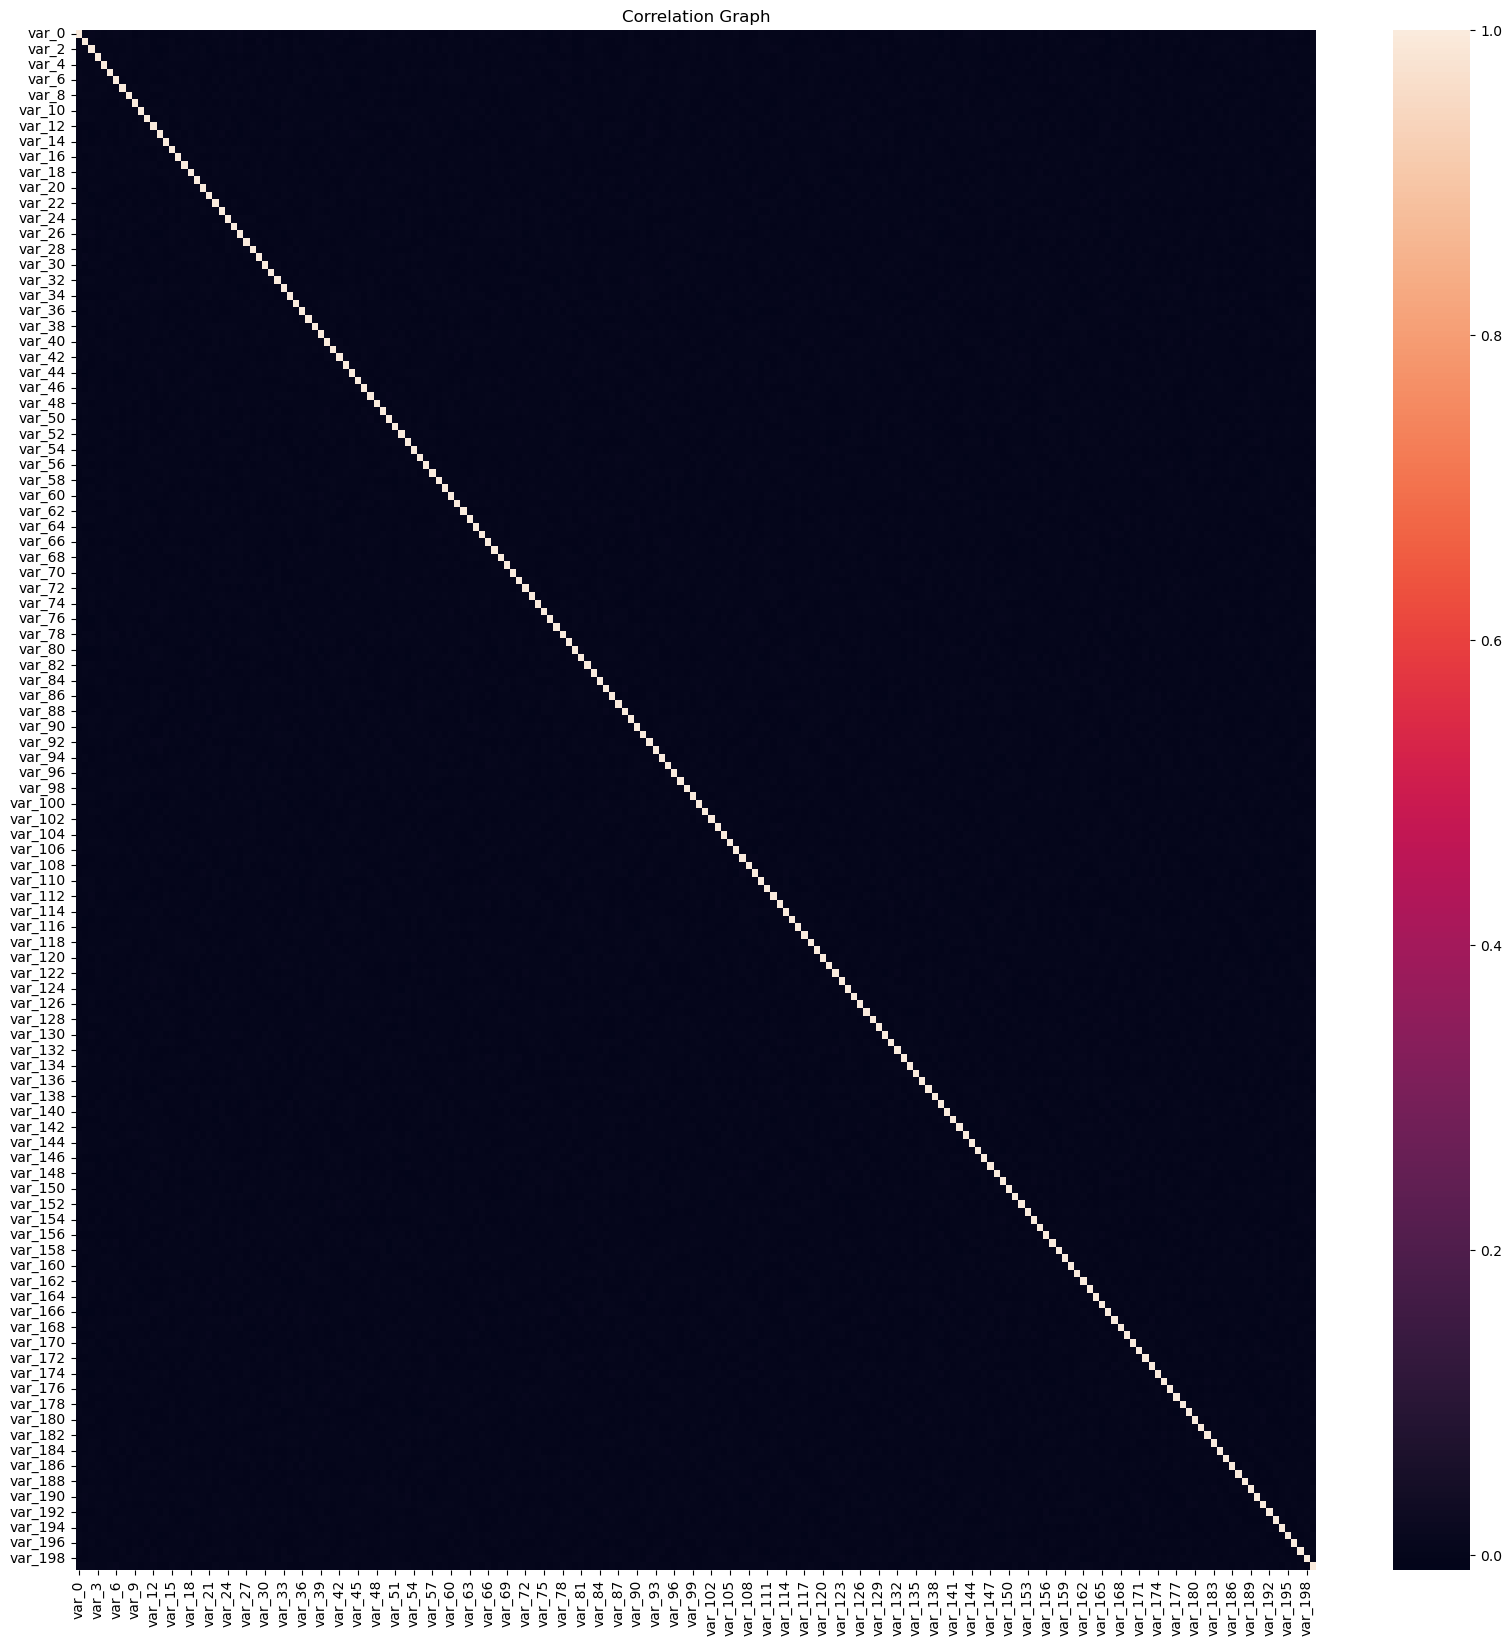

In [20]:
plt.figure(figsize =(20,20))
sns.heatmap(df1.corr())
plt.title('Correlation Graph')
plt.show()

#### Insights : There is no correlation between columns. They are independent to each other

# 4.2 PCA

####     applying pca to reduce dimensionality

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()

In [23]:
pc = pca.fit_transform(df1)

In [24]:
pc

array([[-5.60646899e+00, -2.35544093e+01, -1.89970400e+00, ...,
        -1.12393971e-01, -2.10809277e-01, -8.02212578e-03],
       [ 3.48780279e+01,  1.14692911e+01, -3.75977398e+00, ...,
        -2.72165556e-01, -1.12777391e-01,  3.28639507e-03],
       [-4.79023946e+00, -3.34213441e-01,  1.13593180e+01, ...,
        -3.22305925e-02,  1.00096697e-01,  3.95515690e-03],
       ...,
       [ 3.68422705e+01,  7.76008289e+00,  3.02322139e+01, ...,
        -1.38194416e-01,  3.85424257e-02, -1.12190153e-02],
       [ 3.02309167e+01, -2.44235161e+01,  2.55535530e+01, ...,
         4.14632474e-02,  3.09369603e-02, -7.55186728e-03],
       [-5.99488377e+00,  7.69716402e+00,  1.01116658e+01, ...,
        -1.06529939e-01,  1.66191355e-01,  1.64284382e-03]])

In [25]:
pc1 = pd.DataFrame(data = pc)
pc1

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,11.416698,1.583202,...,0.472871,-0.223471,0.087693,0.316206,0.036188,-0.009724,-0.133439,-0.112394,-0.210809,-0.008022
1,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,8.116709,19.065200,...,0.225520,0.195946,0.182048,-0.232250,0.273408,-0.009637,0.141256,-0.272166,-0.112777,0.003286
2,-4.790239,-0.334213,11.359318,8.533317,1.328571,-3.218286,22.019436,-1.662104,-4.055670,6.217987,...,0.471320,-0.438071,-0.188489,-0.217870,0.103748,0.165172,-0.180427,-0.032231,0.100097,0.003955
3,11.875370,14.050808,24.017588,-4.419429,0.372725,5.805502,20.132591,12.235285,-1.442250,-14.343129,...,-0.292114,0.062670,0.422309,-0.334294,-0.226519,-0.152877,-0.219387,0.108135,0.048418,0.003421
4,52.713134,24.315340,4.334400,23.857627,-17.868964,16.346566,-15.373475,11.752637,-18.458728,-14.795923,...,-0.071497,-0.123040,-0.107644,-0.068425,-0.243074,-0.164265,0.126321,-0.136637,0.008738,0.011002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-10.724375,-1.958727,18.592171,0.293618,12.729369,-3.275323,-4.491881,8.566087,-7.255542,-22.982195,...,-0.406647,0.351763,-0.550519,0.081604,-0.281205,-0.012863,-0.208016,0.148563,-0.200978,-0.001591
199996,14.450776,-0.234316,-16.938289,19.531319,-14.598602,-2.182569,1.678208,0.957558,8.627293,11.098198,...,-0.141632,-0.331478,-0.034503,0.092930,-0.101833,0.398524,-0.047010,0.065695,-0.035576,0.020962
199997,36.842270,7.760083,30.232214,-9.884361,7.401148,4.181994,-1.550976,-5.243006,-3.429384,2.323586,...,-0.180969,-0.127777,0.413451,0.292896,0.150936,-0.161930,0.230666,-0.138194,0.038542,-0.011219
199998,30.230917,-24.423516,25.553553,22.585986,-8.758036,-5.847883,1.114577,3.364121,8.653308,11.481186,...,0.125881,0.241654,-0.221198,0.092024,-0.339687,0.202800,0.008649,0.041463,0.030937,-0.007552


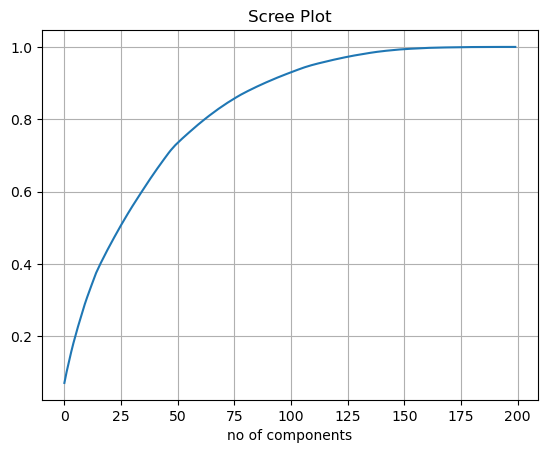

In [26]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('no of components')
plt.grid(True)
plt.show()


# Checking PCA with scaled data

##

In [27]:
pca.fit(df2)

PCA()

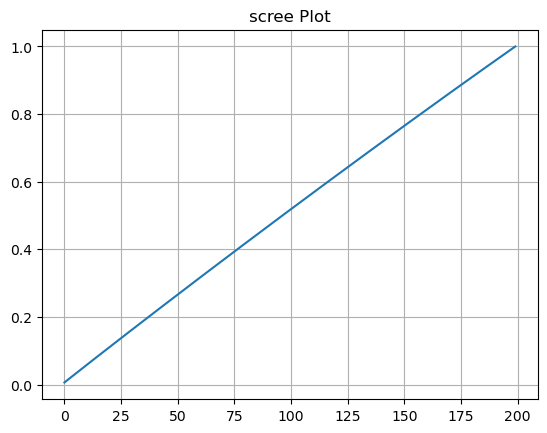

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('scree Plot')
plt.grid(True)
plt.show()


### There is no Elbow point which indicates that the variance is evenly disturbuted across the principal components.

# 5. MODEL CREATION

###### splitting

In [28]:
x = df2

In [29]:
y = df.target

In [30]:
y.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

###### train test split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [32]:
x_train.shape

(150000, 200)

In [33]:
x_test.shape

(50000, 200)

In [34]:
y_train.shape

(150000,)

In [35]:
y_test.shape

(50000,)

### Balancing After Train test split

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [37]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [38]:
y_sm.value_counts()

target
0    135022
1    135022
Name: count, dtype: int64

In [39]:
from collections import Counter

In [40]:
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 135022, 1: 14978})
Counter({0: 135022, 1: 135022})


# Model 1 : LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression(max_iter = 1000)

In [43]:
LR.fit(x_sm,y_sm)

LogisticRegression(max_iter=1000)

In [44]:
LR_y_train = LR.predict(x_train)

In [45]:
(LR_y_train != y_train).sum()

31626

In [46]:
LR_y_train_sm = LR.predict(x_sm)

In [47]:
(LR_y_train_sm != y_sm).sum()

53698

In [48]:
LR_y_pred = LR.predict(x_test)

In [49]:
(y_test != LR_y_pred).sum()

10650

# Model 1 Evaluation

In [50]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report

In [51]:
LR_acc_train = accuracy_score(y_train,LR_y_train)
LR_acc_train

0.78916

In [52]:
LR_acc_train_sm = accuracy_score(y_sm,LR_y_train_sm)
LR_acc_train

0.78916

In [53]:
LR_acc_test = accuracy_score(y_test,LR_y_pred)
LR_acc_test

0.787

In [54]:
LR_pre = precision_score(y_test,LR_y_pred)
LR_pre

0.2925420168067227

In [55]:
LR_recall = recall_score(y_test,LR_y_pred)
LR_recall

0.7615234375

In [56]:
LR_f1 = f1_score(y_test,LR_y_pred)
LR_f1

0.4227016478751084

In [57]:
LR_roc = roc_auc_score(y_test,LR_y_pred)
LR_roc

0.7757149273061497

In [58]:
pd.crosstab(y_test,LR_y_pred)

col_0,0,1
target,,
0,35451,9429
1,1221,3899


In [59]:
print(classification_report(y_train,LR_y_train))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87    135022
           1       0.29      0.77      0.42     14978

    accuracy                           0.79    150000
   macro avg       0.63      0.78      0.65    150000
weighted avg       0.90      0.79      0.83    150000



In [60]:
print(classification_report(y_sm,LR_y_train_sm))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    135022
           1       0.80      0.81      0.80    135022

    accuracy                           0.80    270044
   macro avg       0.80      0.80      0.80    270044
weighted avg       0.80      0.80      0.80    270044



In [61]:
print(classification_report(y_test,LR_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     44880
           1       0.29      0.76      0.42      5120

    accuracy                           0.79     50000
   macro avg       0.63      0.78      0.65     50000
weighted avg       0.90      0.79      0.82     50000



In [62]:
LR_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [LR_acc_test,LR_pre,LR_recall,LR_f1,LR_roc]})

In [63]:
LR_Metrics

,METRIC,VALUE
0,Accuracy,0.787000
1,Precision,0.292542
2,Recall,0.761523
3,F1 Score,0.422702
4,ROC AUC,0.775715


In [64]:
from tabulate import tabulate

In [65]:
print("LOGISTIC REGRESSION METRICS:")
print(tabulate(LR_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

LOGISTIC REGRESSION METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.787    |
+-----------+----------+
| Precision | 0.292542 |
+-----------+----------+
| Recall    | 0.761523 |
+-----------+----------+
| F1 Score  | 0.422702 |
+-----------+----------+
| ROC AUC   | 0.775715 |
+-----------+----------+


### Hyperparameter tuning

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
LR_model = LogisticRegression(solver = 'saga',penalty = 'elasticnet',class_weight = 'balanced',l1_ratio= 0.5,max_iter = 100)

In [69]:
param_grid = { 'C' : [0.01,0.1,1,10,100], 'l1_ratio' : [0.1,0.5,0.9] }

In [70]:
grid_search = GridSearchCV(LR_model,param_grid, cv = 5, scoring = 'precision')

In [71]:
grid_search.fit(x_sm,y_sm)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', l1_ratio=0.5,
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='precision')

In [72]:
grid = grid_search.best_estimator_

In [ ]:
LR_y_pred1 = grid.predict(x_test)

In [ ]:
LR_acc_test2 = accuracy_score(y_test,LR_y_pred1)
LR_acc_test2

0.78792

In [ ]:
LR_pre2 = precision_score(y_test,LR_y_pred1)
LR_pre2

0.2933061962912709

In [ ]:
LR_recall2 = recall_score(y_test,LR_y_pred1)
LR_recall2

0.7599609375

In [ ]:
LR_f12 = f1_score(y_test,LR_y_pred1)
LR_f12

0.42325682584575225

In [ ]:
LR_roc2 = roc_auc_score(y_test,LR_y_pred1)
LR_roc2

0.7755352815842247

In [ ]:
LR2_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [LR_acc_test2,LR_pre2,LR_recall2,LR_f12,LR_roc2]})

In [ ]:
LR2_Metrics

,METRIC,VALUE
0,Accuracy,0.787920
1,Precision,0.293306
2,Recall,0.759961
3,F1 Score,0.423257
4,ROC AUC,0.775535


In [ ]:
print("LOGISTIC REGRESSION FINAL METRICS:")
print(tabulate(LR2_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

LOGISTIC REGRESSION FINAL METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.78792  |
+-----------+----------+
| Precision | 0.293306 |
+-----------+----------+
| Recall    | 0.759961 |
+-----------+----------+
| F1 Score  | 0.423257 |
+-----------+----------+
| ROC AUC   | 0.775535 |
+-----------+----------+


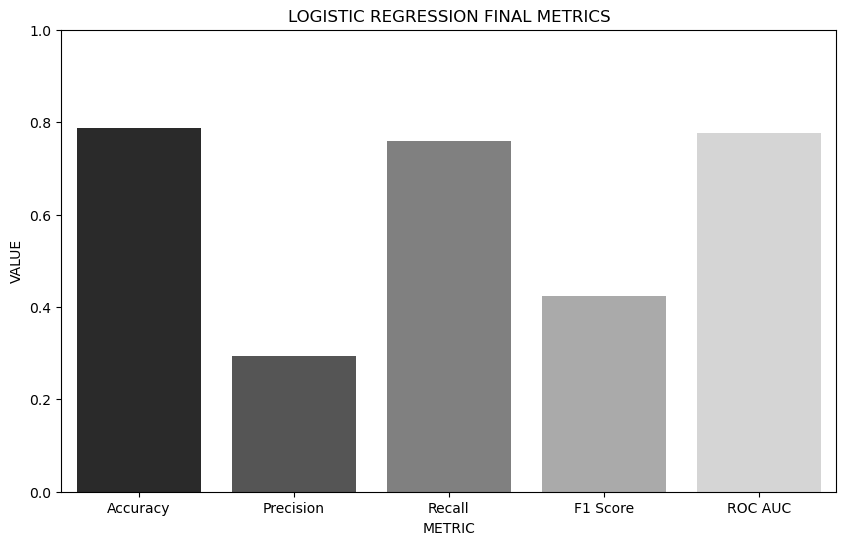

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = LR2_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('LOGISTIC REGRESSION FINAL METRICS')
plt.ylim(0,1)
plt.show()



###### insights:

##### In this Algorithm, we achieved decent metric values, with accuracy at 0.78, recall at 0.75 and roc_auc score at 0.77. However, the precision score of 0.29 indicates that only 29% of positive predictions are correct ,while 71% are incorrect.The low F1 score of 0.42 further highlights the model's struggle to balance precision and recall

##### Despite attempts to improve precision score by performing hyper parameter tuning, the results reamined unchanged.

# Model 2 : DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [ ]:
dt_y_train = dt.predict(x_train)

In [ ]:
(dt_y_train != y_train).sum()

0

In [ ]:
dt_y_train_sm = dt.predict(x_sm)

In [ ]:
(dt_y_train_sm != y_sm).sum()

0

In [ ]:
dt_y_pred = dt.predict(x_test)

In [ ]:
(y_test != dt_y_pred).sum()

14593

# Model 2 Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report

In [ ]:
dt_acc_train = accuracy_score(y_train,dt_y_train)
dt_acc_train

1.0

In [ ]:
dt_acc_train_sm = accuracy_score(y_sm,dt_y_train_sm)
dt_acc_train

1.0

In [ ]:
dt_acc_test = accuracy_score(y_test,dt_y_pred)
dt_acc_test

0.70814

In [ ]:
dt_pre = precision_score(y_test,dt_y_pred)
dt_pre

0.13205934902509128

In [ ]:
dt_recall = recall_score(y_test,dt_y_pred)
dt_recall

0.33203125

In [ ]:
dt_f1 = f1_score(y_test,dt_y_pred)
dt_f1

0.18896237425665535

In [ ]:
dt_roc = roc_auc_score(y_test,dt_y_pred)
dt_roc

0.5415392435383244

In [ ]:
pd.crosstab(y_test,dt_y_pred)

col_0,0,1
target,,
0,33707,11173
1,3420,1700


In [ ]:
print(classification_report(y_train,dt_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    135022
           1       1.00      1.00      1.00     14978

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000



In [ ]:
print(classification_report(y_sm,dt_y_train_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    135022
           1       1.00      1.00      1.00    135022

    accuracy                           1.00    270044
   macro avg       1.00      1.00      1.00    270044
weighted avg       1.00      1.00      1.00    270044



In [ ]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     44880
           1       0.13      0.33      0.19      5120

    accuracy                           0.71     50000
   macro avg       0.52      0.54      0.51     50000
weighted avg       0.83      0.71      0.76     50000



In [ ]:
dt_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [dt_acc_test,dt_pre,dt_recall,dt_f1,dt_roc]})

In [ ]:
dt_Metrics

,METRIC,VALUE
0,Accuracy,0.708140
1,Precision,0.132059
2,Recall,0.332031
3,F1 Score,0.188962
4,ROC AUC,0.541539


In [ ]:
print("DECISION TREE METRICS:")
print(tabulate(dt_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

DECISION TREE METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.70814  |
+-----------+----------+
| Precision | 0.132059 |
+-----------+----------+
| Recall    | 0.332031 |
+-----------+----------+
| F1 Score  | 0.188962 |
+-----------+----------+
| ROC AUC   | 0.541539 |
+-----------+----------+


#   Hyperparameter Tuning in dt

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":[3,5,10,None],
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":[1,2,4]
}

In [ ]:
dt2 = RandomizedSearchCV(dt, params, scoring='accuracy', cv = 5,n_iter = 10, verbose = 2, n_jobs=-1)

In [ ]:
dt2.fit(x_sm,y_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ('best', 'random')},
                   scoring='accuracy', verbose=2)

In [ ]:
dt2.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'entropy'}

In [ ]:
dt2.best_score_

0.7694598132470203

In [ ]:
dt3 = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= None,
 min_samples_leaf= 2,
 min_samples_split= 3,
 splitter= 'best')

In [ ]:
dt3.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=3)

# Evaluating after Hyper Parameter tuning

In [ ]:
dt3_y_pred_final = dt3.predict(x_test)

In [ ]:
dt3_acc_test1= accuracy_score(y_test,dt3_y_pred_final)
dt3_acc_test1

0.71818

In [ ]:
dt3_pre1 = precision_score(y_test,dt3_y_pred_final)
dt3_pre1

0.1330879345603272

In [ ]:
dt3_recall1 = recall_score(y_test,dt3_y_pred_final)
dt3_recall1

0.3177734375

In [ ]:
dt3_f11 = f1_score(y_test,dt3_y_pred_final)
dt3_f11

0.18760449697319112

In [ ]:
dt3_roc1 = roc_auc_score(y_test,dt3_y_pred_final)
dt3_roc1

0.5408163087678254

In [ ]:
print(classification_report(y_test,dt3_y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     44880
           1       0.13      0.32      0.19      5120

    accuracy                           0.72     50000
   macro avg       0.52      0.54      0.51     50000
weighted avg       0.83      0.72      0.76     50000



In [ ]:
dt3_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [dt3_acc_test1,dt3_pre1,dt3_recall1,dt3_f11,dt3_roc1]})

In [ ]:
dt3_Metrics

,METRIC,VALUE
0,Accuracy,0.718180
1,Precision,0.133088
2,Recall,0.317773
3,F1 Score,0.187604
4,ROC AUC,0.540816


In [ ]:
print("DECISION TREE METRICS AFTER HYPERPARAMETER TUNING:")
print(tabulate(dt3_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

DECISION TREE METRICS AFTER HYPERPARAMETER TUNING:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.71818  |
+-----------+----------+
| Precision | 0.133088 |
+-----------+----------+
| Recall    | 0.317773 |
+-----------+----------+
| F1 Score  | 0.187604 |
+-----------+----------+
| ROC AUC   | 0.540816 |
+-----------+----------+


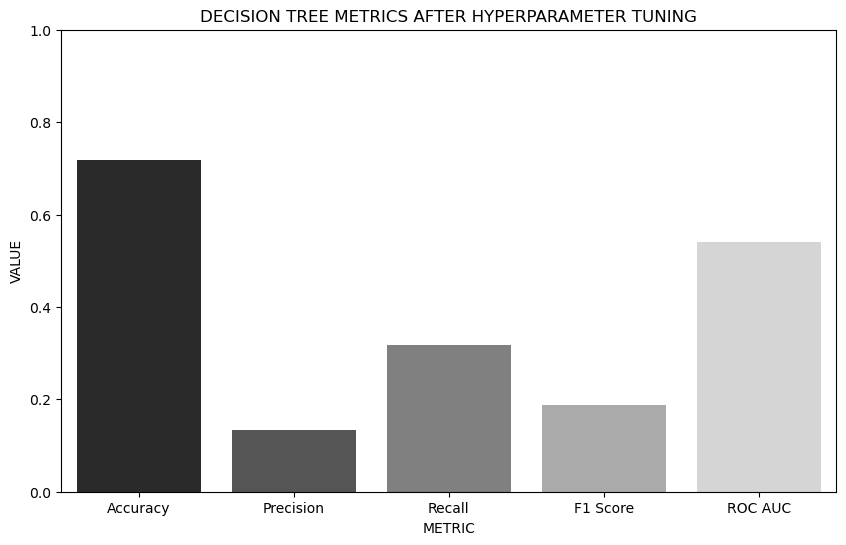

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = dt3_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('DECISION TREE METRICS AFTER HYPERPARAMETER TUNING')
plt.ylim(0,1)
plt.show()



###### insights :

### This model shows signs of overfitting, as evidenced by a prefect training accuracy of 1.00, but much lower prerformance on the test datset, with an accuracy of 0.71

### This model does not generalize well to new data, making it unsuitable as our best model

# MODEL 3 : RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

In [ ]:
rf.fit(x_sm,y_sm)

RandomForestClassifier()

In [ ]:
rf_y_train = rf.predict(x_train)

In [ ]:
(rf_y_train != y_train).sum()

0

In [ ]:
rf_y_train_sm = rf.predict(x_sm)

In [ ]:
(rf_y_train_sm != y_sm).sum()

0

In [ ]:
rf_y_pred = rf.predict(x_test)

In [ ]:
(y_test != rf_y_pred).sum()

5270

# Model 3 Evaluation

In [ ]:
rf_acc_train = accuracy_score(y_train,rf_y_train)
rf_acc_train

1.0

In [ ]:
rf_acc_train_sm = accuracy_score(y_sm,rf_y_train_sm)
rf_acc_train

1.0

In [ ]:
rf_acc_test = accuracy_score(y_test,rf_y_pred)
rf_acc_test

0.8946

In [ ]:
rf_pre = precision_score(y_test,rf_y_pred)
rf_pre

0.3188405797101449

In [ ]:
rf_recall = recall_score(y_test,rf_y_pred)
rf_recall

0.02578125

In [ ]:
rf_f1 = f1_score(y_test,rf_y_pred)
rf_f1

0.047705095771593785

In [ ]:
rf_roc = roc_auc_score(y_test,rf_y_pred)
rf_roc

0.5097489137700536

In [ ]:
pd.crosstab(y_test,rf_y_pred)

col_0,0,1
target,,
0,44598,282
1,4988,132


In [ ]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     44880
           1       0.32      0.03      0.05      5120

    accuracy                           0.89     50000
   macro avg       0.61      0.51      0.50     50000
weighted avg       0.84      0.89      0.85     50000



In [ ]:
rf_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [rf_acc_test,rf_pre,rf_recall,rf_f1,rf_roc]})

In [ ]:
rf_Metrics

,METRIC,VALUE
0,Accuracy,0.894600
1,Precision,0.318841
2,Recall,0.025781
3,F1 Score,0.047705
4,ROC AUC,0.509749


In [ ]:
print("RANDOM FOREST METRICS:")
print(tabulate(rf_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

RANDOM FOREST METRICS:
+-----------+-----------+
| METRIC    |     VALUE |
+===========+===========+
| Accuracy  | 0.8946    |
+-----------+-----------+
| Precision | 0.318841  |
+-----------+-----------+
| Recall    | 0.0257812 |
+-----------+-----------+
| F1 Score  | 0.0477051 |
+-----------+-----------+
| ROC AUC   | 0.509749  |
+-----------+-----------+


# HyperParameter Tuning in RF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [100,200,300,400,500]
max_features = ['auto', 'sqrt']
max_depth = [None,10,20,30,40,50]
min_samples_split = [2, 5,10]
min_samples_leaf = [1, 2,4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rscv2 = RandomizedSearchCV(estimator=rfc, scoring='accuracy',param_distributions=random_grid, n_iter=5, cv=3,
                               verbose=1, random_state=42, n_jobs=-1)

In [ ]:
rscv2.fit(x_sm,y_sm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
rscv2.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
rf3 = RandomForestClassifier(n_estimators = 500,
  min_samples_split = 5,
  min_samples_leaf = 1,
  max_features ='sqrt',
  max_depth = 50,
  bootstrap= False)

In [ ]:
rf3.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=500)

In [ ]:
rf3_y_pred = rf3.predict(x_test)

In [ ]:
rf3_acc_test = accuracy_score(y_test,rf3_y_pred)
rf3_acc_test

0.89632

In [ ]:
rf3_pre = precision_score(y_test,rf3_y_pred)
rf3_pre

0.3709677419354839

In [ ]:
rf3_recall = recall_score(y_test,rf3_y_pred)
rf3_recall

0.01796875

In [ ]:
rf3_f1 = f1_score(y_test,rf3_y_pred)
rf3_f1

0.03427719821162444

In [ ]:
rf3_roc = roc_auc_score(y_test,rf3_y_pred)
rf3_roc

0.5072464070855616

In [ ]:
pd.crosstab(y_test,rf3_y_pred)

col_0,0,1
target,,
0,44724,156
1,5028,92


In [ ]:
print(classification_report(y_test ,rf3_y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.37      0.02      0.03      5120

    accuracy                           0.90     50000
   macro avg       0.63      0.51      0.49     50000
weighted avg       0.84      0.90      0.85     50000



In [ ]:
rf3_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [rf3_acc_test,rf3_pre,rf3_recall,rf3_f1,rf3_roc]})

In [ ]:
rf3_Metrics

,METRIC,VALUE
0,Accuracy,0.896320
1,Precision,0.370968
2,Recall,0.017969
3,F1 Score,0.034277
4,ROC AUC,0.507246


In [ ]:
print("RANDOM FOREST METRICS AFTER HYPERPARAMTER TUNING:")
print(tabulate(rf3_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

RANDOM FOREST METRICS AFTER HYPERPARAMTER TUNING:
+-----------+-----------+
| METRIC    |     VALUE |
+===========+===========+
| Accuracy  | 0.89632   |
+-----------+-----------+
| Precision | 0.370968  |
+-----------+-----------+
| Recall    | 0.0179687 |
+-----------+-----------+
| F1 Score  | 0.0342772 |
+-----------+-----------+
| ROC AUC   | 0.507246  |
+-----------+-----------+


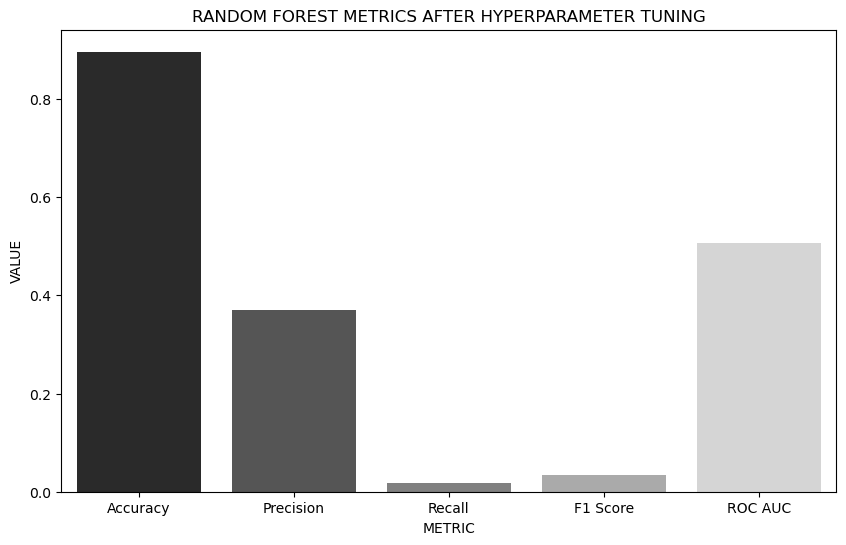

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = rf3_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('RANDOM FOREST METRICS AFTER HYPERPARAMETER TUNING')
plt.show()



###### insights :

### The Random Forest model has good accuracy of 0.8963, but its very low recall(0.017) and F1 score(0.034) indicate poor performance in identifying the positive class.

### the ROC AUC of 0.50 further suggests that the model's effectiveness is limited

# MODEL 4 SVM

In [ ]:
from sklearn.svm import SVC
sv = SVC()

### SVM found strugling significantly with the dataset, primirily due to its large size and high dimensionality .

#### Trying reduced dataset size to see if the svm performs

In [ ]:
x_small,_,y_small,_ = train_test_split(x_sm,y_sm,test_size = 0.9,random_state = 42)

In [ ]:
x_small_train,x_small_test,y_small_train,y_small_test = train_test_split(x_small,y_small,test_size = 0.25,random_state = 42)

In [ ]:
sv.fit(x_small_train,y_small_train)

SVC()

In [ ]:
sv_y_train = sv.predict(x_train)
sv_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
sv_y_train_sm = sv.predict(x_sm)

In [ ]:
sv_y_pred = sv.predict(x_test)
sv_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
(y_test != sv_y_pred).sum()

7126

### Model 4 Evaluation

In [ ]:
print(classification_report(y_train,sv_y_train))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93    135022
           1       0.36      0.39      0.37     14978

    accuracy                           0.87    150000
   macro avg       0.65      0.65      0.65    150000
weighted avg       0.87      0.87      0.87    150000



In [ ]:
print(classification_report(y_sm,sv_y_train_sm))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90    135022
           1       0.92      0.86      0.89    135022

    accuracy                           0.89    270044
   macro avg       0.89      0.89      0.89    270044
weighted avg       0.89      0.89      0.89    270044



In [ ]:
sv_acc_test = accuracy_score(y_test,sv_y_pred)
sv_acc_test

0.85748

In [ ]:
sv_pre_test = precision_score(y_test,sv_y_pred)
sv_pre_test

0.30193522906793047

In [ ]:
sv_recall_test = recall_score(y_test,sv_y_pred)
sv_recall_test

0.2986328125

In [ ]:
sv_f1 = f1_score(y_test,sv_y_pred)
sv_f1

0.30027494108405345

In [ ]:
sv_roc = roc_auc_score(y_test,sv_y_pred)
sv_roc

0.609933607676025

In [ ]:
pd.crosstab(y_test,sv_y_pred)

col_0,0,1
target,,
0,41345,3535
1,3591,1529


In [ ]:
print(classification_report(y_test,sv_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     44880
           1       0.30      0.30      0.30      5120

    accuracy                           0.86     50000
   macro avg       0.61      0.61      0.61     50000
weighted avg       0.86      0.86      0.86     50000



In [ ]:
sv_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [sv_acc_test,sv_pre_test,sv_recall_test,sv_f1,sv_roc]})

In [ ]:
sv_Metrics

,METRIC,VALUE
0,Accuracy,0.857480
1,Precision,0.301935
2,Recall,0.298633
3,F1 Score,0.300275
4,ROC AUC,0.609934


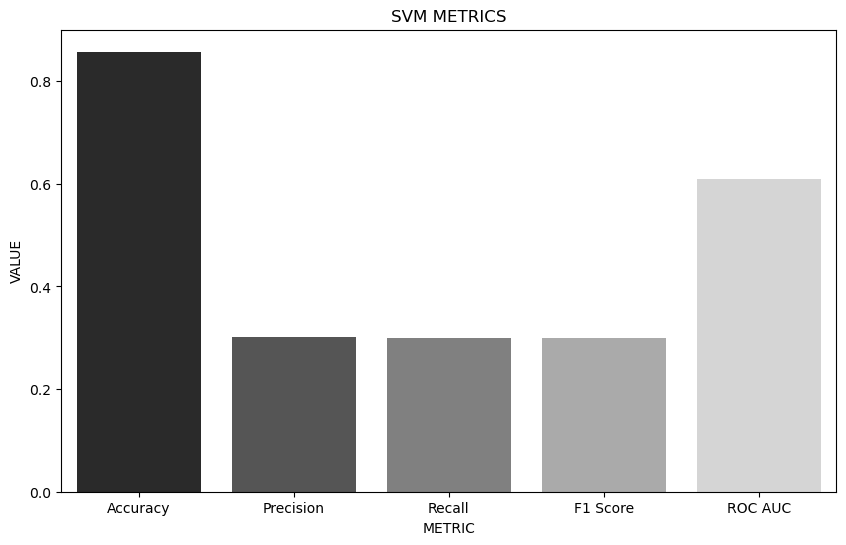

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = sv_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('SVM METRICS')
plt.show()



###### insights :

### - In this Algorithm, we evaluated the Support Vector Machine(SVM) model on smaller subset of the dataset due to difficulties in fitting the model on the full dataset


### - The high accuracy indicates that the SVM model is capable of capturing the data subset .

### - Despite, its strong performance on small data, SVM is not the best model of our project due to its limitations with larger datasets

# MODEL 5 KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [ ]:
knn_y_train = knn.predict(x_train)
knn_y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
knn_y_train_sm = knn.predict(x_sm)
knn_y_train_sm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
knn_y_pred = knn.predict(x_test)
knn_y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
(y_test != knn_y_pred).sum()

44880

In [ ]:
(y_test != knn_y_pred).sum()/len(y_test)

0.8976

In [ ]:
(y_test != knn_y_pred).sum()/len(y_test)*100 #error percentace when we took k=5

89.75999999999999

In [ ]:
ERROR=[]
for i in range(1,11):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_sm,y_sm)
    knn_y_pred1=knn1.predict(x_test)
    error=(y_test !=knn_y_pred1).sum()/len(y_test)*100
    ERROR.append(error)
print(ERROR)

[89.57000000000001, 89.372, 89.756, 89.756, 89.75999999999999, 89.75999999999999, 89.75999999999999, 89.75999999999999, 89.75999999999999, 89.75999999999999]


<Axes: >

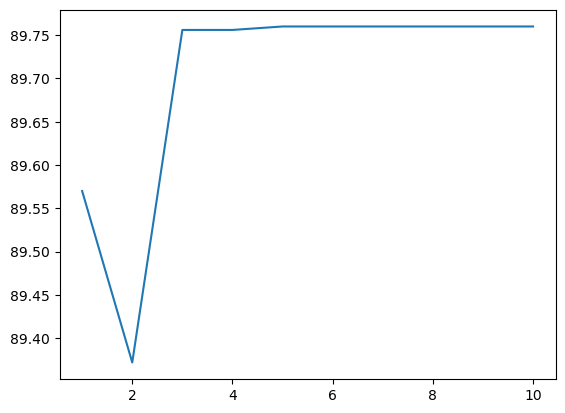

In [ ]:
sns.lineplot(x=range(1,11),y=ERROR)

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=2)
knn3.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_y_pred2=knn3.predict(x_test)
knn_y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Model 5 Evaluation

In [ ]:
knn_acc_y_train = accuracy_score(y_train,knn_y_train)
knn_acc_y_train

0.09988666666666667

In [ ]:
print(classification_report(y_train,knn_y_train))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00    135022
           1       0.10      1.00      0.18     14978

    accuracy                           0.10    150000
   macro avg       0.55      0.50      0.09    150000
weighted avg       0.91      0.10      0.02    150000



In [ ]:
knn_acc_y_train_sm = accuracy_score(y_sm,knn_y_train_sm)
knn_acc_y_train_sm

0.5000185155011776

In [ ]:
print(classification_report(y_sm,knn_y_train_sm))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00    135022
           1       0.50      1.00      0.67    135022

    accuracy                           0.50    270044
   macro avg       0.75      0.50      0.33    270044
weighted avg       0.75      0.50      0.33    270044



In [ ]:
knn_acc_test = accuracy_score(y_test,knn_y_pred2)
knn_acc_test

0.10628

In [ ]:
knn_pre = precision_score(y_test,knn_y_pred2)
knn_pre

0.10247960454929068

In [ ]:
knn_recall = recall_score(y_test,knn_y_pred2)
knn_recall

0.99609375

In [ ]:
knn_f1 = f1_score(y_test,knn_y_pred2)
knn_f1

0.18583974055314653

In [ ]:
knn_roc= roc_auc_score(y_test,knn_y_pred2)
knn_roc

0.5004310104723707

In [ ]:
pd.crosstab(y_test,knn_y_pred2)

col_0,0,1
target,,
0,214,44666
1,20,5100


In [ ]:
print(classification_report(y_test,knn_y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.00      0.01     44880
           1       0.10      1.00      0.19      5120

    accuracy                           0.11     50000
   macro avg       0.51      0.50      0.10     50000
weighted avg       0.83      0.11      0.03     50000



In [ ]:
knn_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [knn_acc_test,knn_pre,knn_recall,knn_f1,knn_roc]})

In [ ]:
knn_Metrics

,METRIC,VALUE
0,Accuracy,0.106280
1,Precision,0.102480
2,Recall,0.996094
3,F1 Score,0.185840
4,ROC AUC,0.500431


In [ ]:
print("KNN EVALUATION METRIC:")
print(tabulate(knn_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

KNN EVALUATION METRIC:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.10628  |
+-----------+----------+
| Precision | 0.10248  |
+-----------+----------+
| Recall    | 0.996094 |
+-----------+----------+
| F1 Score  | 0.18584  |
+-----------+----------+
| ROC AUC   | 0.500431 |
+-----------+----------+


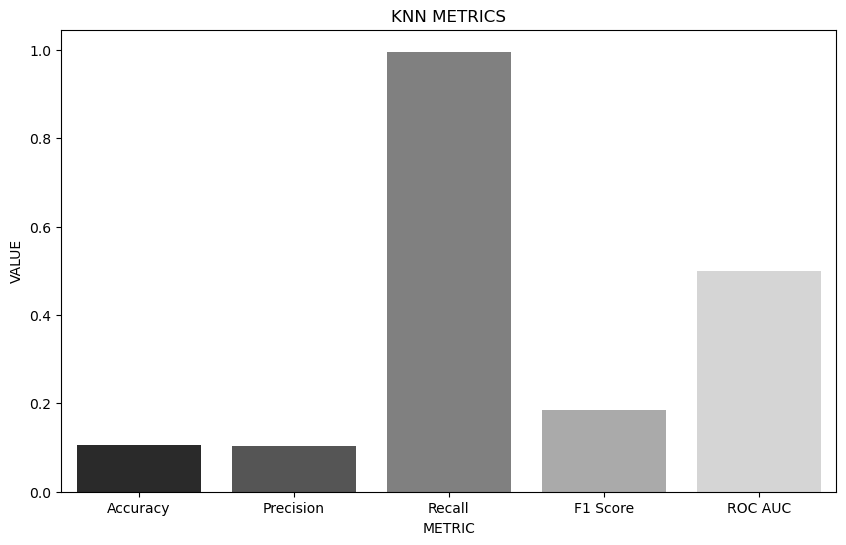

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = knn_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('KNN METRICS')
plt.show()



###### insights :

### The KNN model shows a high recall of 0.99 , but suffers from very low accuracy and precision, leading to many false positives.

### This indicates that model is unrealiable . Therefore, KNN is not suitable for our project due to its overall poor performance

# MODEL 6 XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_y_train = xgb.predict(x_train)

In [ ]:
(xgb_y_train != y_train).sum()

12923

In [ ]:
xgb_y_train_sm = xgb.predict(x_sm)

In [ ]:
(xgb_y_train_sm != y_sm).sum()

16537

In [ ]:
xgb_y_pred = xgb.predict(x_test)

In [ ]:
(xgb_y_pred != y_test).sum()

7522

# Model 6 Evaluation

In [ ]:
print(classification_report(y_train,xgb_y_train))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95    135022
           1       0.56      0.64      0.60     14978

    accuracy                           0.91    150000
   macro avg       0.76      0.79      0.78    150000
weighted avg       0.92      0.91      0.92    150000



In [ ]:
xgb_acc_train = accuracy_score(y_train,xgb_y_train)
xgb_acc_train

0.9139066666666666

In [ ]:
print(classification_report(y_sm,xgb_y_train_sm))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94    135022
           1       0.94      0.93      0.94    135022

    accuracy                           0.94    270044
   macro avg       0.94      0.94      0.94    270044
weighted avg       0.94      0.94      0.94    270044



In [ ]:
xgb_acc_train_sm  = accuracy_score(y_sm,xgb_y_train_sm)
xgb_acc_train_sm

0.9387618314052525

In [ ]:
xgb_acc_test = accuracy_score(y_test,xgb_y_pred)
xgb_acc_test

0.84956

In [ ]:
xgb_pre = precision_score(y_test,xgb_y_pred)
xgb_pre

0.2884073291050035

In [ ]:
xgb_recall = recall_score(y_test,xgb_y_pred)
xgb_recall

0.3197265625

In [ ]:
xgb_f1 = f1_score(y_test,xgb_y_pred)
xgb_f1

0.3032604668395702

In [ ]:
xgb_roc = roc_auc_score(y_test,xgb_y_pred)
xgb_roc

0.6148655094139929

In [ ]:
pd.crosstab(y_test,xgb_y_pred)

col_0,0,1
target,,
0,40841,4039
1,3483,1637


In [ ]:
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     44880
           1       0.29      0.32      0.30      5120

    accuracy                           0.85     50000
   macro avg       0.60      0.61      0.61     50000
weighted avg       0.86      0.85      0.85     50000



#  XGB Hyperparameter Tuning

In [ ]:
XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid1 = {'gamma': [0,0.1,0.3,0.5,1,2,5],
              'learning_rate': [0.01,0.05,0.1,0.2,0.3],
              'max_depth': [3,5,7,9,12],
              'n_estimators': [100,200,300,500],
              'reg_alpha': [0,0.01,0.1,0.5,1],
              'reg_lambda': [0,0.01,0.1,0.5,1]}

In [ ]:
rcv1= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid1, n_iter=50, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rcv1.fit(x_sm,y_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.3, 0.5, 1, 2, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.01, 0.1, 0.5, 1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rcv1.best_params_

{'reg_lambda': 0.5,
 'reg_alpha': 0.5,
 'n_estimators': 200,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [ ]:
xgb3 = XGBClassifier(reg_lambda= 0.5, reg_alpha= 0.5, n_estimators=200, max_depth=12, learning_rate=0.1, gamma=0.1)

In [ ]:
xgb3.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb3_y_pred = xgb3.predict(x_test)

In [ ]:
xgb3_acc_test = accuracy_score(y_test,xgb3_y_pred)
xgb3_acc_test

0.8913

In [ ]:
xgb3_pre = precision_score(y_test,xgb3_y_pred)
xgb3_pre

0.4146341463414634

In [ ]:
xgb3_recall = recall_score(y_test,xgb3_y_pred)
xgb3_recall

0.1494140625

In [ ]:
xgb3_f1 = f1_score(y_test,xgb3_y_pred)
xgb3_f1

0.2196697774587222

In [ ]:
xgb3_roc = roc_auc_score(y_test,xgb3_y_pred)
xgb3_roc

0.5626749456885027

In [ ]:
pd.crosstab(y_test,xgb3_y_pred)

col_0,0,1
target,,
0,43800,1080
1,4355,765


In [ ]:
print(classification_report(y_test,xgb3_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     44880
           1       0.41      0.15      0.22      5120

    accuracy                           0.89     50000
   macro avg       0.66      0.56      0.58     50000
weighted avg       0.86      0.89      0.87     50000



In [ ]:
xgb_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [xgb3_acc_test,xgb3_pre,xgb3_recall,xgb3_f1,xgb3_roc]})

In [ ]:
xgb_Metrics

,METRIC,VALUE
0,Accuracy,0.891300
1,Precision,0.414634
2,Recall,0.149414
3,F1 Score,0.219670
4,ROC AUC,0.562675


In [ ]:
from tabulate import tabulate

In [ ]:
print("XGB EVALUATION METRICS:")
print(tabulate(xgb_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

XGB EVALUATION METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.8913   |
+-----------+----------+
| Precision | 0.414634 |
+-----------+----------+
| Recall    | 0.149414 |
+-----------+----------+
| F1 Score  | 0.21967  |
+-----------+----------+
| ROC AUC   | 0.562675 |
+-----------+----------+


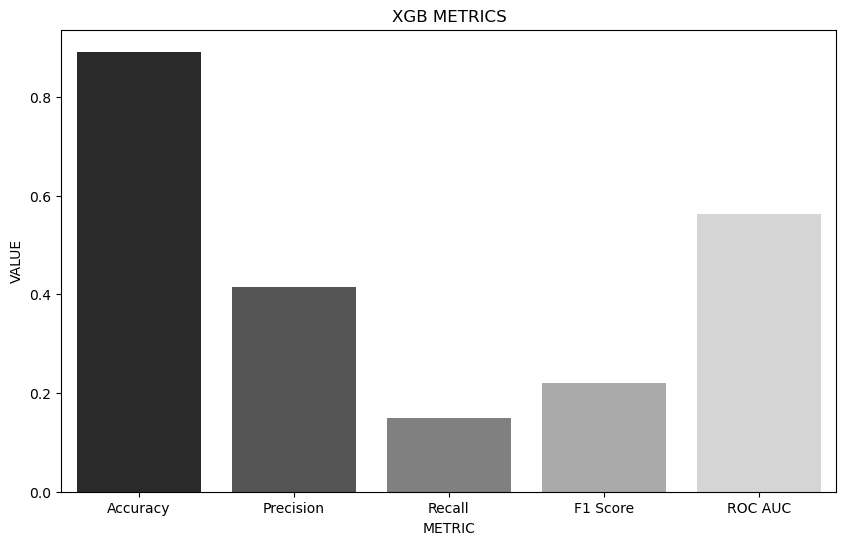

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = xgb_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('XGB METRICS')
plt.show()



###### insights :

### XGB model's accuracy is good, but the recall score and F1 score are too low, so this model effectiveness is limited

# MODEL 7 : NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_sm,y_sm)

GaussianNB()

In [ ]:
gnb_y_train = gnb.predict(x_train)

In [ ]:
(gnb_y_train != y_train).sum()

19829

In [ ]:
gnb_y_train_sm = gnb.predict(x_sm)
gnb_y_train_sm

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
(gnb_y_train_sm != y_sm).sum()

34245

In [ ]:
gnb_y_pred = gnb.predict(x_test)

In [ ]:
(gnb_y_pred != y_test).sum()

6742

# MODEL 7 EVALUATION

In [ ]:
gnb_acc_train = accuracy_score(y_train,gnb_y_train)
gnb_acc_train

0.8678066666666666

In [ ]:
print(classification_report(y_train,gnb_y_train))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93    135022
           1       0.19      0.10      0.13     14978

    accuracy                           0.87    150000
   macro avg       0.55      0.53      0.53    150000
weighted avg       0.83      0.87      0.85    150000



In [ ]:
gnb_acc_train_sm  = accuracy_score(y_sm,gnb_y_train_sm)
gnb_acc_train_sm

0.8731873324347144

In [ ]:
print(classification_report(y_sm,gnb_y_train_sm))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88    135022
           1       0.94      0.79      0.86    135022

    accuracy                           0.87    270044
   macro avg       0.88      0.87      0.87    270044
weighted avg       0.88      0.87      0.87    270044



In [ ]:
gnb_acc_test = accuracy_score(y_test,gnb_y_pred)
gnb_acc_test

0.86516

In [ ]:
gnb_pre = precision_score(y_test,gnb_y_pred)
gnb_pre

0.17868462757527734

In [ ]:
gnb_recall = recall_score(y_test,gnb_y_pred)
gnb_recall

0.0880859375

In [ ]:
gnb_f1 = f1_score(y_test,gnb_y_pred)
gnb_f1

0.11800104657247515

In [ ]:
gnb_roc = roc_auc_score(y_test,gnb_y_pred)
gnb_roc

0.5209480489639038

In [ ]:
pd.crosstab(y_test,gnb_y_pred)

col_0,0,1
target,,
0,42807,2073
1,4669,451


In [ ]:
print(classification_report(y_test,gnb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     44880
           1       0.18      0.09      0.12      5120

    accuracy                           0.87     50000
   macro avg       0.54      0.52      0.52     50000
weighted avg       0.83      0.87      0.84     50000



In [ ]:
gnb_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [gnb_acc_test,gnb_pre,gnb_recall,gnb_f1,gnb_roc]})

In [ ]:
gnb_Metrics

,METRIC,VALUE
0,Accuracy,0.865160
1,Precision,0.178685
2,Recall,0.088086
3,F1 Score,0.118001
4,ROC AUC,0.520948


In [ ]:
print("NAIVE BAYES EVALUATION METRIC:")
print(tabulate(gnb_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

NAIVE BAYES EVALUATION METRIC:
+-----------+-----------+
| METRIC    |     VALUE |
+===========+===========+
| Accuracy  | 0.86516   |
+-----------+-----------+
| Precision | 0.178685  |
+-----------+-----------+
| Recall    | 0.0880859 |
+-----------+-----------+
| F1 Score  | 0.118001  |
+-----------+-----------+
| ROC AUC   | 0.520948  |
+-----------+-----------+


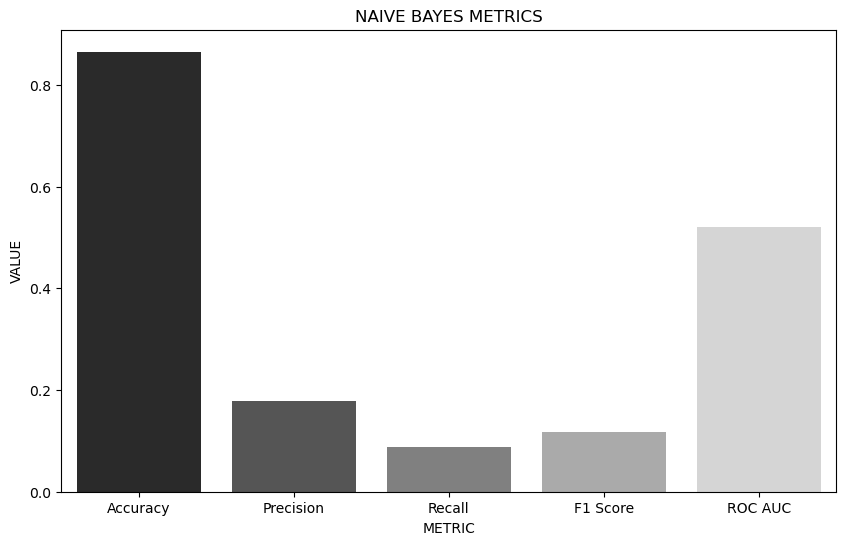

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = gnb_Metrics,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('NAIVE BAYES METRICS')
plt.show()



###### insights :

### The Naive Bayes model is not suitable, as it shows high accuracy of 0.86 but performs poorly in identifying the positive class , with low precision of 0.17 and recall of 0.088

# MODEL 8 : LIGHTGBM

In [ ]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.4 MB 491.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.

In [ ]:
import lightgbm as lgb

In [ ]:
gbm = lgb.LGBMClassifier(class_weight = 'balanced')

In [ ]:
gbm.fit(x_sm,y_sm)

[LightGBM] [Info] Number of positive: 135022, number of negative: 135022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.270863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 270044, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced')

In [ ]:
gbm_y_train = gbm.predict(x_train)

In [ ]:
(gbm_y_train != y_train).sum()

17637

In [ ]:
gbm_y_train_sm = gbm.predict(x_sm)
gbm_y_train_sm

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
(gbm_y_train_sm != y_sm).sum()

29325

In [ ]:
gbm_y_pred = gbm.predict(x_test)

In [ ]:
(gbm_y_pred != y_test).sum()

7168

# Model 8 Evaluation

In [ ]:
gbm_acc_train = accuracy_score(y_train,gbm_y_train)
gbm_acc_train

0.88242

In [ ]:
print(classification_report(y_train,gbm_y_train))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93    135022
           1       0.40      0.38      0.39     14978

    accuracy                           0.88    150000
   macro avg       0.67      0.66      0.66    150000
weighted avg       0.88      0.88      0.88    150000



In [ ]:
gbm_acc_train_sm  = accuracy_score(y_sm,gbm_y_train_sm)
gbm_acc_train_sm

0.8914065855934589

In [ ]:
print(classification_report(y_sm,gbm_y_train_sm))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90    135022
           1       0.93      0.84      0.89    135022

    accuracy                           0.89    270044
   macro avg       0.89      0.89      0.89    270044
weighted avg       0.89      0.89      0.89    270044



In [ ]:
gbm_acc_test = accuracy_score(y_test,gbm_y_pred)
gbm_acc_test

0.85664

In [ ]:
gbm_pre = precision_score(y_test,gbm_y_pred)
gbm_pre

0.28072805139186296

In [ ]:
gbm_recall = recall_score(y_test,gbm_y_pred)
gbm_recall

0.2560546875

In [ ]:
gbm_f1 = f1_score(y_test,gbm_y_pred)
gbm_f1

0.26782431052093975

In [ ]:
gbm_roc = roc_auc_score(y_test,gbm_y_pred)
gbm_roc

0.5906053294897504

In [ ]:
pd.crosstab(y_test,gbm_y_pred)

col_0,0,1
target,,
0,41521,3359
1,3809,1311


In [ ]:
print(classification_report(y_test,gbm_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     44880
           1       0.28      0.26      0.27      5120

    accuracy                           0.86     50000
   macro avg       0.60      0.59      0.59     50000
weighted avg       0.85      0.86      0.85     50000



In [ ]:
gbm_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [gbm_acc_test,gbm_pre,gbm_recall,gbm_f1,gbm_roc]})

In [ ]:
gbm_Metrics

,METRIC,VALUE
0,Accuracy,0.856640
1,Precision,0.280728
2,Recall,0.256055
3,F1 Score,0.267824
4,ROC AUC,0.590605


In [ ]:
print("GBM METRICS:")
print(tabulate(gbm_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

GBM METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.85664  |
+-----------+----------+
| Precision | 0.280728 |
+-----------+----------+
| Recall    | 0.256055 |
+-----------+----------+
| F1 Score  | 0.267824 |
+-----------+----------+
| ROC AUC   | 0.590605 |
+-----------+----------+


# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform,randint

In [ ]:
param_distributions = { 'num_leaves' : randint(20,150),
                      'learning_rate ': uniform(0.01,0.03),
                      'n_estimators' : randint(50,500),
                      'max_depth' : randint(-1,20),
                      'min_child_samples' : randint(10,100)}

In [ ]:
random_search = RandomizedSearchCV(gbm,param_distributions,n_iter = 20,cv = 5,scoring = 'precision',verbose = 1, n_jobs = -1,random_state = 42)

In [ ]:
random_search.fit(x_sm,y_sm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.03909729556485983
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.03909729556485983
[LightGBM] [Info] Number of positive: 135022, number of negative: 135022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.225870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 270044, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(class_weight='balanced'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate ': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E93D55D2D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E93D6A70D0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E93D6B2B90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E93D642250>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8E6733BD0>},
                   random_state=42, scoring='precision', verbose=1)

In [ ]:
best_model = random_search.best_estimator_

In [ ]:
gbm_y_pred1 = best_model.predict(x_test)

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.03909729556485983


In [ ]:
gbm_acc_test1 = accuracy_score(y_test,gbm_y_pred1)
gbm_acc_test1

0.88376

In [ ]:
gbm_pre1 = precision_score(y_test,gbm_y_pred1)
gbm_pre1

0.39393010423053343

In [ ]:
gbm_recall1 = recall_score(y_test,gbm_y_pred1)
gbm_recall1

0.2509765625

In [ ]:
gbm_f11 = f1_score(y_test,gbm_y_pred1)
gbm_f11

0.3066094010975901

In [ ]:
gbm_roc1 = roc_auc_score(y_test,gbm_y_pred1)
gbm_roc1

0.6034628801804812

In [ ]:
pd.crosstab(y_test,gbm_y_pred1)

col_0,0,1
target,,
0,42903,1977
1,3835,1285


In [ ]:
print(classification_report(y_test,gbm_y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     44880
           1       0.39      0.25      0.31      5120

    accuracy                           0.88     50000
   macro avg       0.66      0.60      0.62     50000
weighted avg       0.86      0.88      0.87     50000



In [ ]:
gbm_Metrics1 =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [gbm_acc_test1,gbm_pre1,gbm_recall1,gbm_f11,gbm_roc1]})

In [ ]:
gbm_Metrics1

,METRIC,VALUE
0,Accuracy,0.883760
1,Precision,0.393930
2,Recall,0.250977
3,F1 Score,0.306609
4,ROC AUC,0.603463


In [ ]:
print("GBM METRICS AFTER HYPERPARAMETER TUNING:")
print(tabulate(gbm_Metrics1,headers ='keys',tablefmt= 'grid',showindex = False))

GBM METRICS AFTER HYPERPARAMETER TUNING:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.88376  |
+-----------+----------+
| Precision | 0.39393  |
+-----------+----------+
| Recall    | 0.250977 |
+-----------+----------+
| F1 Score  | 0.306609 |
+-----------+----------+
| ROC AUC   | 0.603463 |
+-----------+----------+


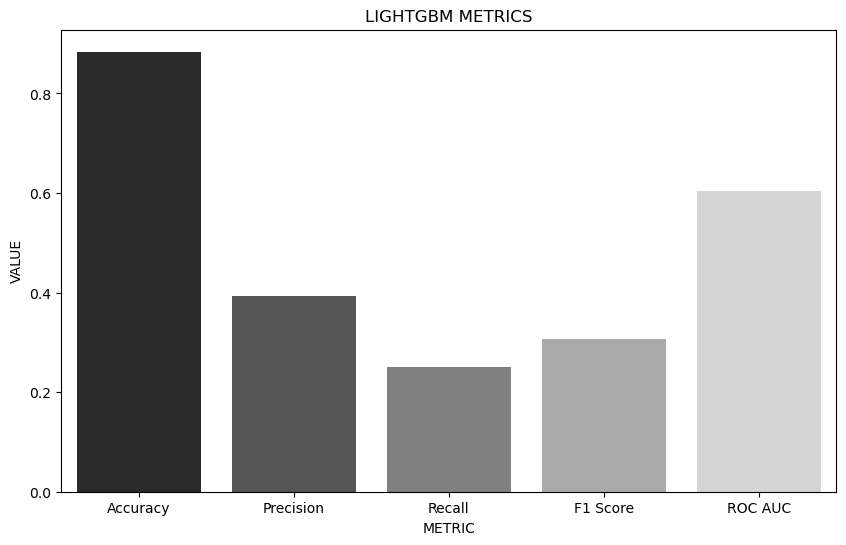

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(data = gbm_Metrics1,x = 'METRIC', y = 'VALUE',palette = 'gray')
plt.title('LIGHTGBM METRICS')
plt.show()



###### insights :

LightGBM excels in accuracy (0.88376) but faces challenges in recall (0.250977), suggesting a need for refinement to detect more positive instances. Its performance is decent but not outstanding, as indicated by the moderate F1 score (0.306609) and ROC-AUC score (0.6034).

# PROJECT CONCLUSION

###### Introduction

In this project, we aimed to develop a predictive model to identify customers who are likely to make future transactions in the banking sector. Accurate prediction of such transactions is crucial for targeting and improving customer engagement strategies.

###### Data Description

The dataset used for this project consists of 2lakh samples with 202 features. The data is balanced, with classes indicating whether a customer will transact (Class 1) or not (Class 0). Preprocessing steps included only scaling the data as there are no null values,categorical data and no data is behaving like outliers.

###### Methodology

We evaluated several machine learning models, including Logistic Regression, Decision Tree, Random Forest, SVM, KNN, XGBoost, Naive Bayes, and LightGBM. Hyperparameter tuning was performed using GridSearchCv for Logistic Regression and RandomizedSearchCV for all Decision Tree, Random Forest , XGBoost and LightGBM to optimize performance

###### Evaluation Metrics

The following metrics were used to assess model performance:

▪ Accuracy

▪ Precision

▪ Recall

▪ F1 Score

▪ ROC AUC

In [ ]:
final_data = {
    'METRIC': ['ACCURACY','PRECICION','RECALL','F1 SCORE','ROC_AUC SCORE'],
    'LOGISTIC REGRESSION' : [0.7879,0.29
                             33,0.7600,0.4233,0.7755],
    'KNN' : [0.1062,0.1024,0.9900,0.1858,0.5004],
    'NAIVE BAYES' :[0.8651,0.1786,0.0880,0.1180,0.5209],
    'SVM' : [0.8574,0.3019,0.2986,0.3002,0.6099],
    'DECISION TREE' : [0.7181,0.1331,0.3177,0.1876,0.5408],
    'RANDOM FOREST' : [0.8963,0.3709,0.0170,0.0340,0.5072],
    'XGB' : [0.8913,0.4146,0.1490,0.2190,0.5620],
    'LIGHTGBM' : [0.8838,0.3939,0.2510,0.3066,0.6034]}

In [ ]:
final = pd.DataFrame(final_data)

<Figure size 10000x10000 with 0 Axes>

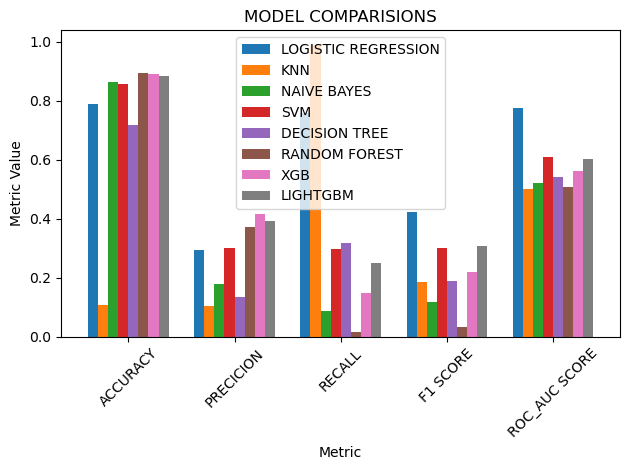

In [ ]:
plt.figure(figsize=(100,100))
final.plot(x = 'METRIC',kind ='bar',width = 0.76)
plt.title('MODEL COMPARISIONS')
plt.ylabel('Metric Value')
plt.xlabel('Metric')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
final.to_csv("model_comparision.csv", index = False)

In [ ]:
pd.read_csv('model_comparision.csv')

,METRIC,LOGISTIC REGRESSION,KNN,NAIVE BAYES,SVM,DECISION TREE,RANDOM FOREST,XGB,LIGHTGBM
0,ACCURACY,0.7879,0.1062,0.8651,0.8574,0.7181,0.8963,0.8913,0.8838
1,PRECICION,0.2933,0.1024,0.1786,0.3019,0.1331,0.3709,0.4146,0.3939
2,RECALL,0.7600,0.9900,0.0880,0.2986,0.3177,0.0170,0.1490,0.2510
3,F1 SCORE,0.4233,0.1858,0.1180,0.3002,0.1876,0.0340,0.2190,0.3066
4,ROC_AUC SCORE,0.7755,0.5004,0.5209,0.6099,0.5408,0.5072,0.5620,0.6034


###### Analysis

Best Model Based on Metrics

##### ▪ Accuracy

Random Forest has the highest accuracy (0.8963), but this comes with very low precision and recall, which suggests it might be predicting the majority class too often.

###### ▪ Precision

XGBoost (0.4146) and LightGBM (0.3939) have the highest precision, meaning they are better at identifying true positives among the predicted positives.

###### ▪ Recall

KNN has the highest recall (0.9900), but at the cost of very low accuracy.

###### ▪ F1 Score

LightGBM (0.3066) and LogisticRegression (0.4233) have better F1 scores compared to other models.

###### ▪ ROC AUC

Logistic Regression (0.7755) has the highest ROC AUC, indicating it has a good capability to distinguish between classes.

###### Best Overall Models : Logistic Regression or LightGBM

###### Based on the evaluation metrics:

After evaluating the performance of various machine learning models, we selected LightGBM as the optimal model for our project due to its:



 1. Higher accuracy: LightGBM demonstrated a higher accuracy rate (0.88376) compared to Logistic Regression (0.7879), indicating better overall performance.


2. Ability to handle complex relationships: LightGBM's advanced gradient boosting algorithm can effectively capture intricate feature interactions, making it well-suited for our dataset's complexities.


3. Faster training time: Despite its sophistication, LightGBM's training time remains relatively fast, enabling practical application on large datasets.



While Logistic Regression achieved a higher F1 score, LightGBM's advantages in accuracy and handling complex relationships make it the preferred choice for our project, prioritizing prediction accuracy and robustness.